In [1]:
suppressPackageStartupMessages({
    library("dplyr")
    library("Matrix")
    library("Seurat")
    library("SeuratWrappers")
    library("tictoc")
    library("ggplot2")
    library("ggpubr")
    library("future")
    library("SingleR")
    library("scRNAseq")
    library("scater")
    library("pheatmap")
})

In [2]:
load("./PP1_data/ABMaLP1_PP1.rda")

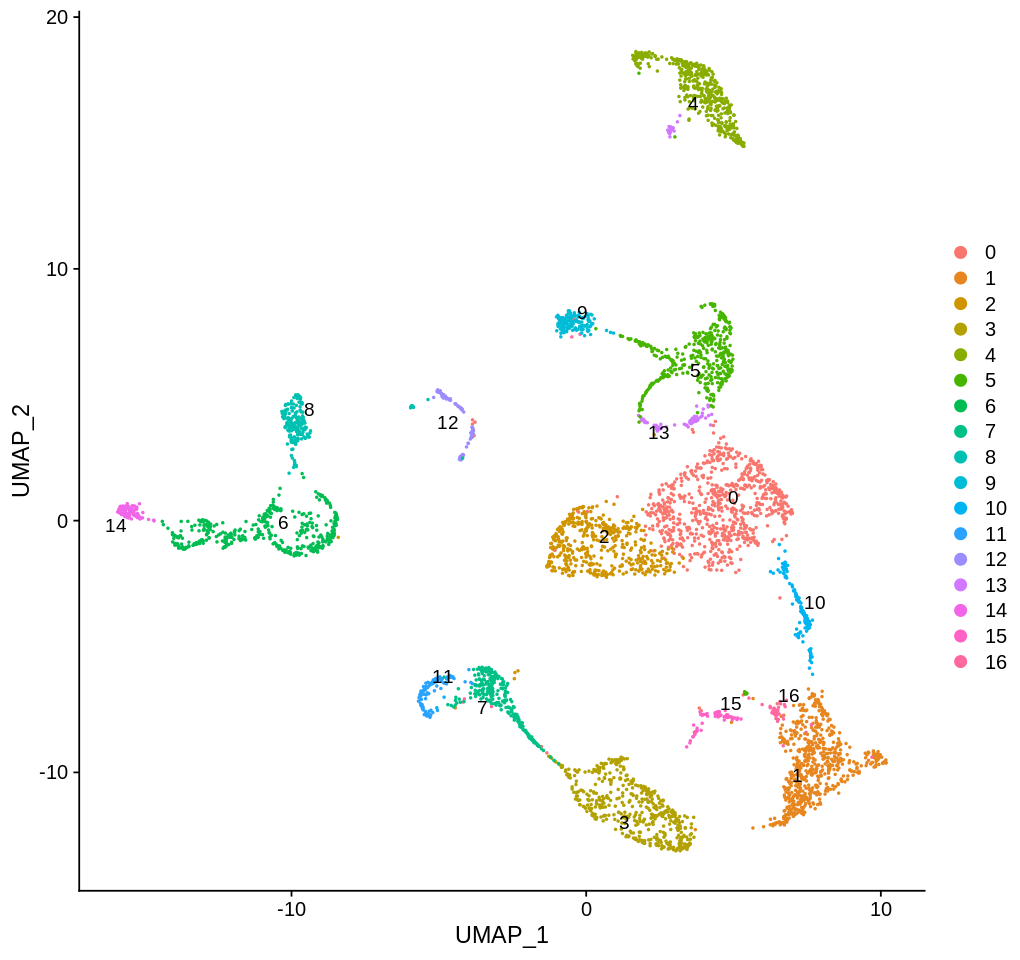

In [17]:
options(repr.plot.width=8.5, repr.plot.height=8)
UMAPPlot(seu, group.by="RNA_snn_res.0.5", label=T, repel=T)

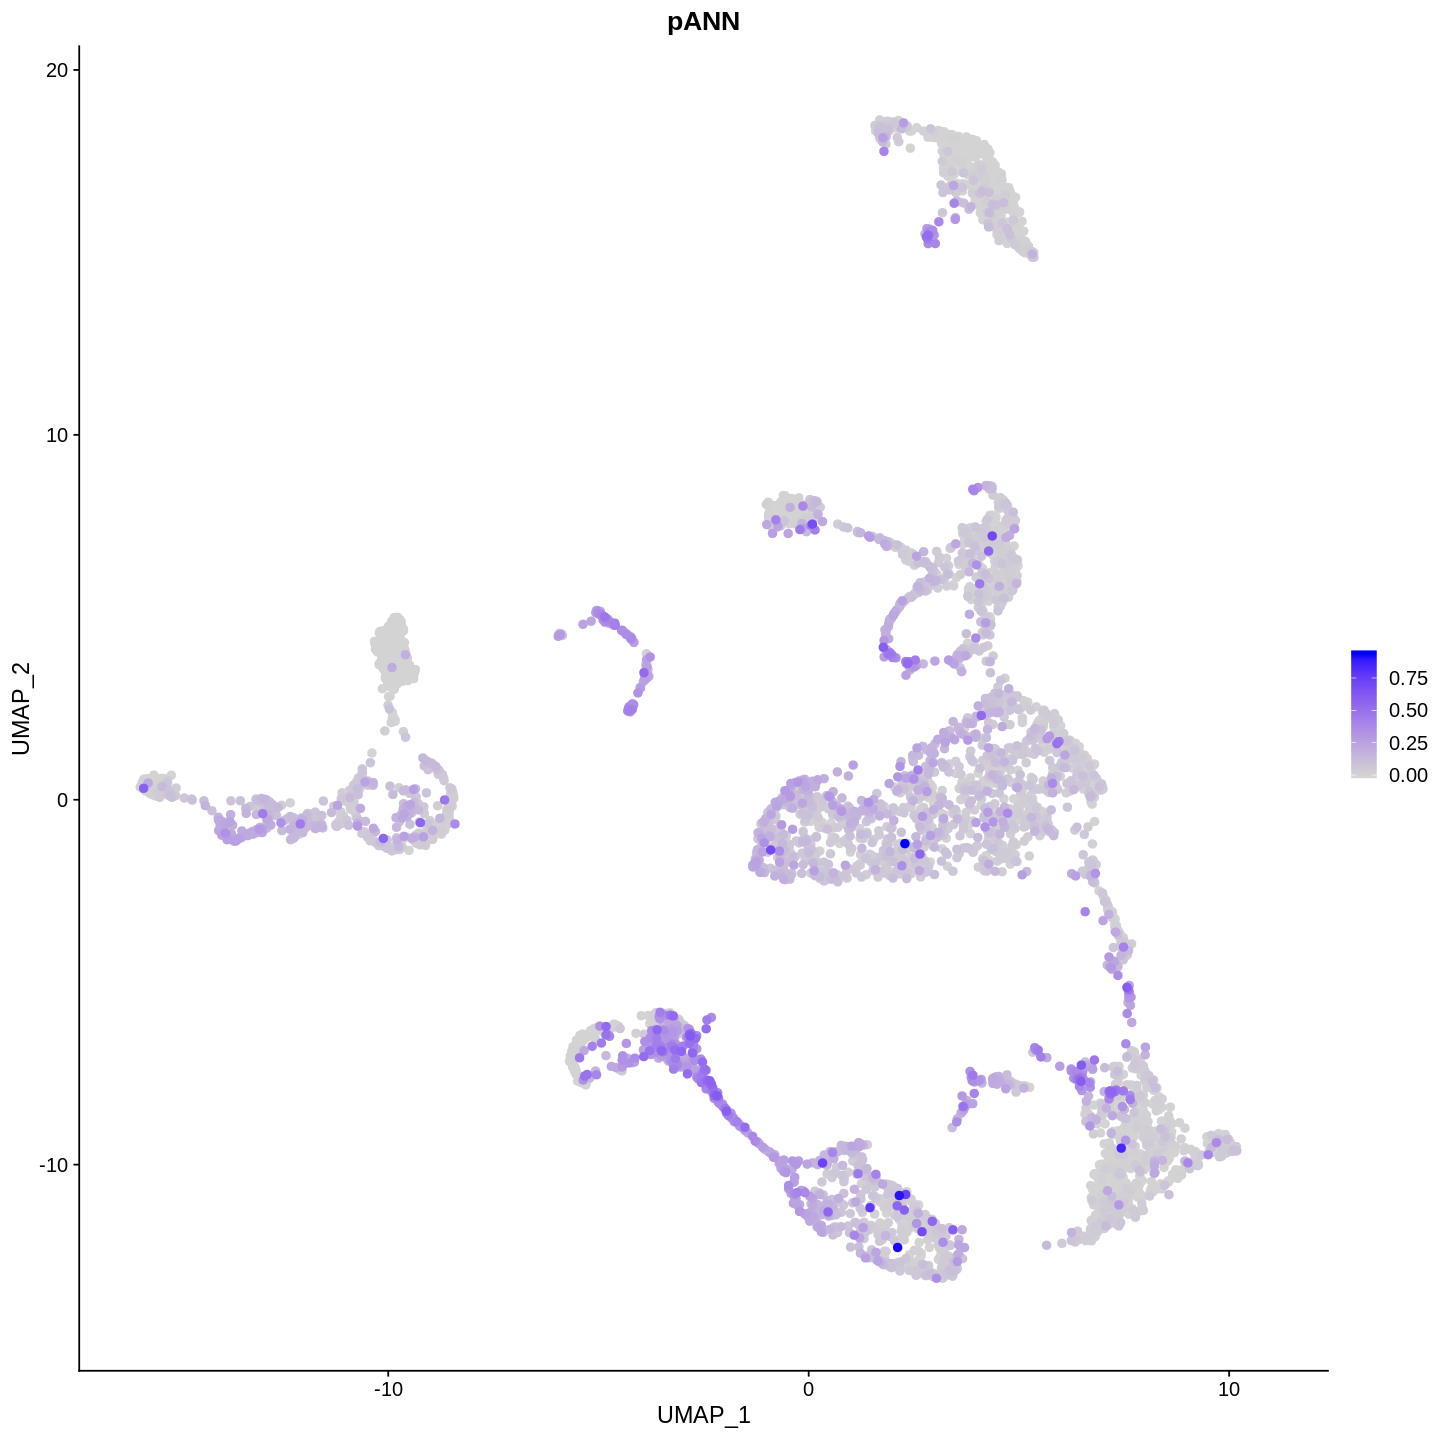

In [4]:
options(repr.plot.width=12, repr.plot.height=12,repe.plot.resolution=300)
FeaturePlot(seu, features="pANN",pt.size=2, sort.cell = T)

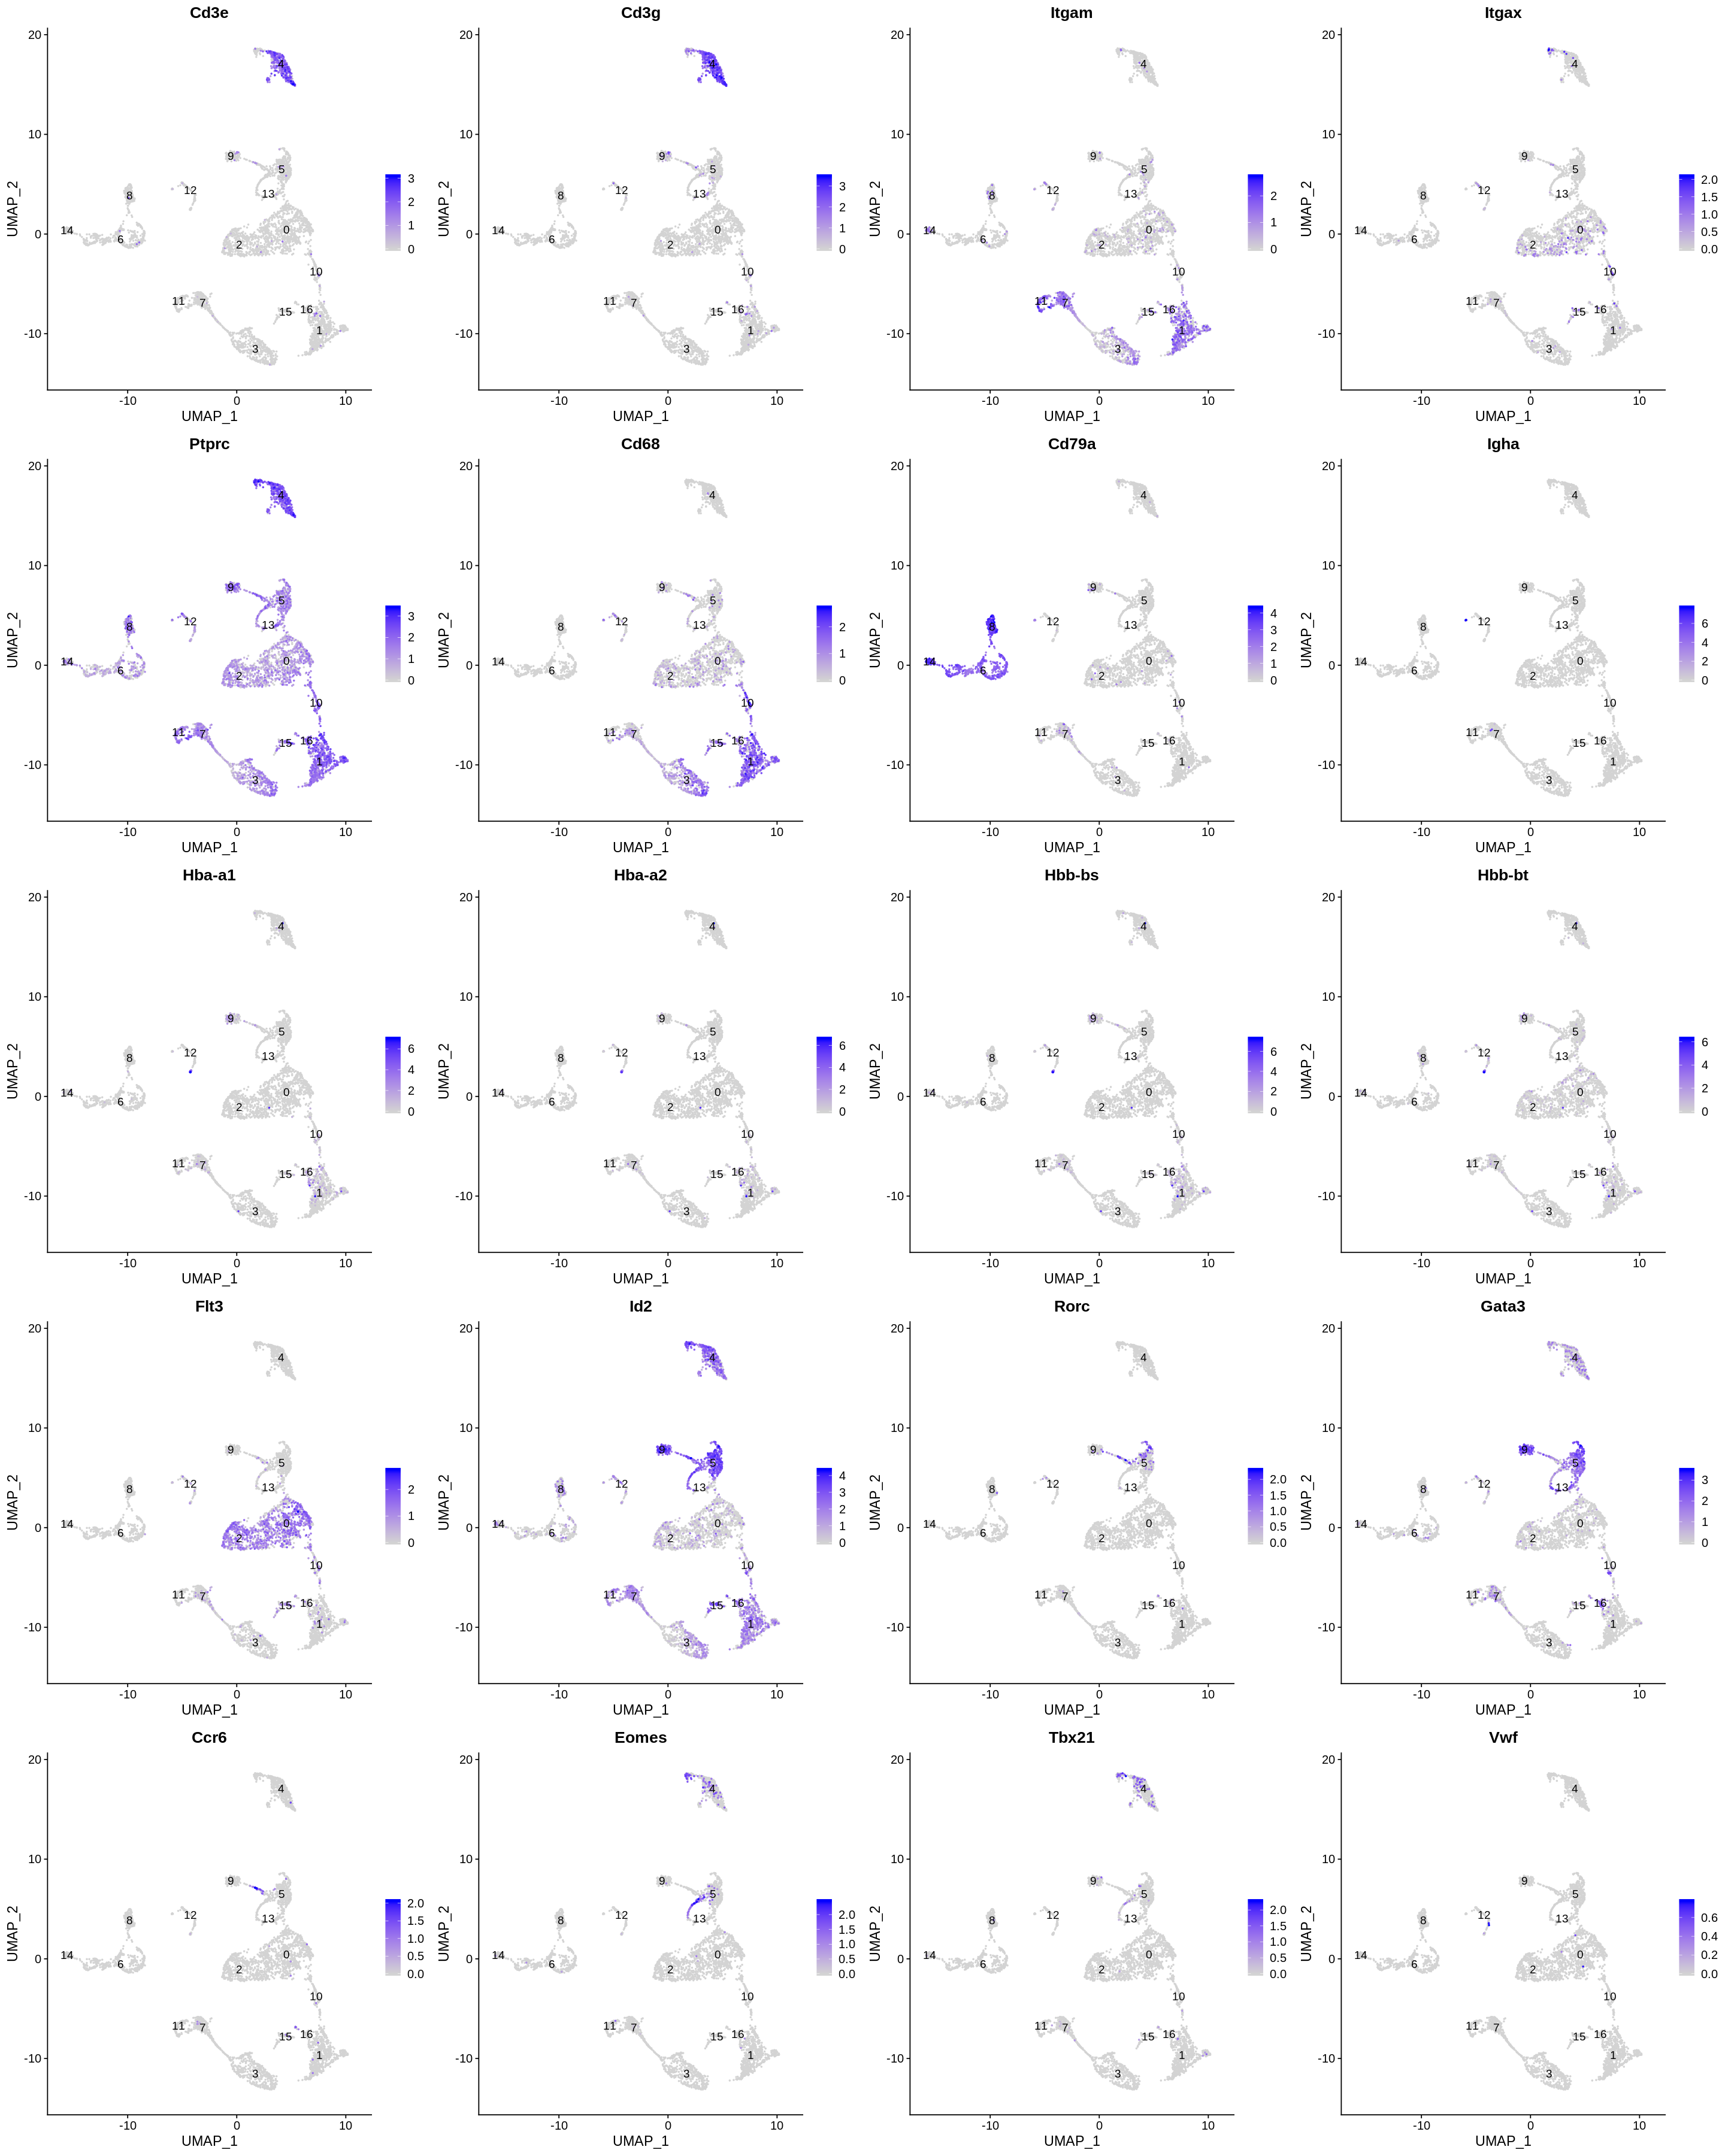

In [5]:
options(repr.plot.width=6*4, repr.plot.height=6*5,repe.plot.resolution=300)
FeaturePlot(seu, ncol=4, label=T, sort.cell = T,
            features = c("Cd3e","Cd3g","Itgam","Itgax",
                         "Ptprc","Cd68","Cd79a","Igha",
                         "Hba-a1","Hba-a2","Hbb-bs","Hbb-bt",
                         "Flt3","Id2","Rorc","Gata3",
                         "Ccr6","Eomes","Tbx21","Vwf"))

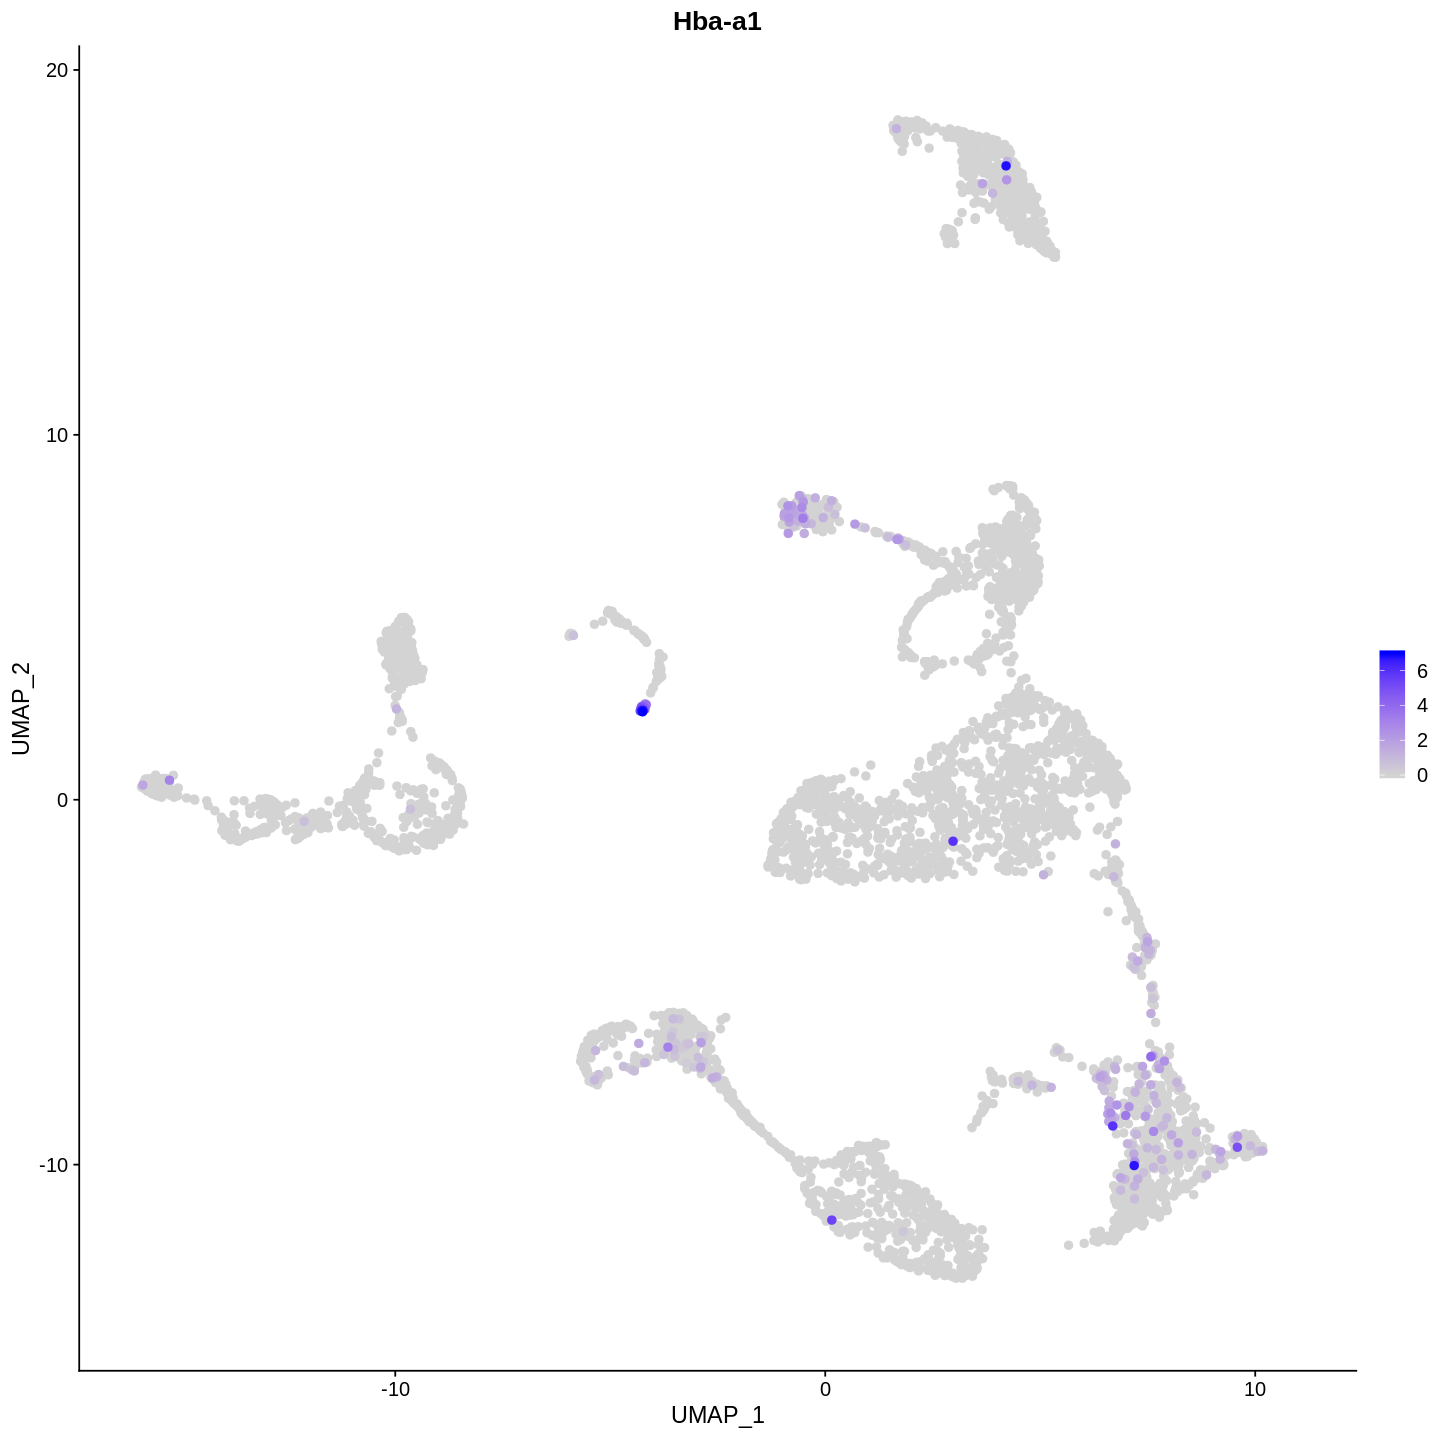

In [5]:
options(repr.plot.width=12, repr.plot.height=12,repe.plot.resolution=300)
FeaturePlot(seu, features="Hba-a1", pt.size=2, sort.cell = T)

# Primary cell type allocation

## SingleR cell type annotation

## Reference datasets provided by SingleR

- Human

    HumanPrimaryCellAtlasData()
    
    BlueprintEncodeData()
    
    DatabaseImmuneCellExpressionData()
    
    NovershternHematopoieticData()
    
    MonacoImmuneData()
    

- Mouse

    ImmGenData()
    
    MouseRNAseqData()

In [ ]:
tic()
ref       <- ImmGenData()
mat       <- GetAssayData(seu, slot="data")
pred.immgen.fine <- SingleR(test = mat, ref = ref, labels = ref$label.fine)
pred.immgen.main <- SingleR(test = mat, ref = ref, labels = ref$label.main)
toc()

Using temporary cache /tmp/Rtmp3b2Sif/BiocFileCache

snapshotDate(): 2019-10-22

Using temporary cache /tmp/Rtmp3b2Sif/BiocFileCache

see ?SingleR and browseVignettes('SingleR') for documentation

Using temporary cache /tmp/Rtmp3b2Sif/BiocFileCache

Using temporary cache /tmp/Rtmp3b2Sif/BiocFileCache

downloading 1 resources

retrieving 1 resource

Using temporary cache /tmp/Rtmp3b2Sif/BiocFileCache

loading from cache

Using temporary cache /tmp/Rtmp3b2Sif/BiocFileCache

Using temporary cache /tmp/Rtmp3b2Sif/BiocFileCache

Using temporary cache /tmp/Rtmp3b2Sif/BiocFileCache

see ?SingleR and browseVignettes('SingleR') for documentation

Using temporary cache /tmp/Rtmp3b2Sif/BiocFileCache

Using temporary cache /tmp/Rtmp3b2Sif/BiocFileCache

downloading 1 resources

retrieving 1 resource

Using temporary cache /tmp/Rtmp3b2Sif/BiocFileCache

loading from cache

Using temporary cache /tmp/Rtmp3b2Sif/BiocFileCache

Using temporary cache /tmp/Rtmp3b2Sif/BiocFileCache

Using temporary cache

In [8]:
pred.immgen.main

DataFrame with 4865 rows and 5 columns
                                                                    scores
                                                                  <matrix>
AAACCTGAGATAGCAT  0.20479276741136:0.232063267439033:0.276118296773868:...
AAACCTGAGCCACTAT  0.17866036249181:0.204644513785876:0.241004951263329:...
AAACCTGAGGAATGGA 0.395006705000951:0.455884358497049:0.263407280544427:...
AAACCTGCAAATACAG  0.221771874267265:0.216259653741516:0.35755999404576:...
AAACCTGCAATGAATG 0.157334339636985:0.183329724322216:0.294476064323818:...
...                                                                    ...
TTTGTCAGTATCAGTC 0.188439670065143:0.207134788668165:0.286536953525119:...
TTTGTCAGTCATATCG 0.222875241742707:0.245955268709288:0.266400000973872:...
TTTGTCAGTGAGTGAC 0.285653687303505:0.293142852170446:0.302162043493668:...
TTTGTCATCAGTACGT 0.217774412127195:0.240111418023613:0.422612412413823:...
TTTGTCATCGGCGCTA  0.38733949794828:0.397651360013935:0.399653

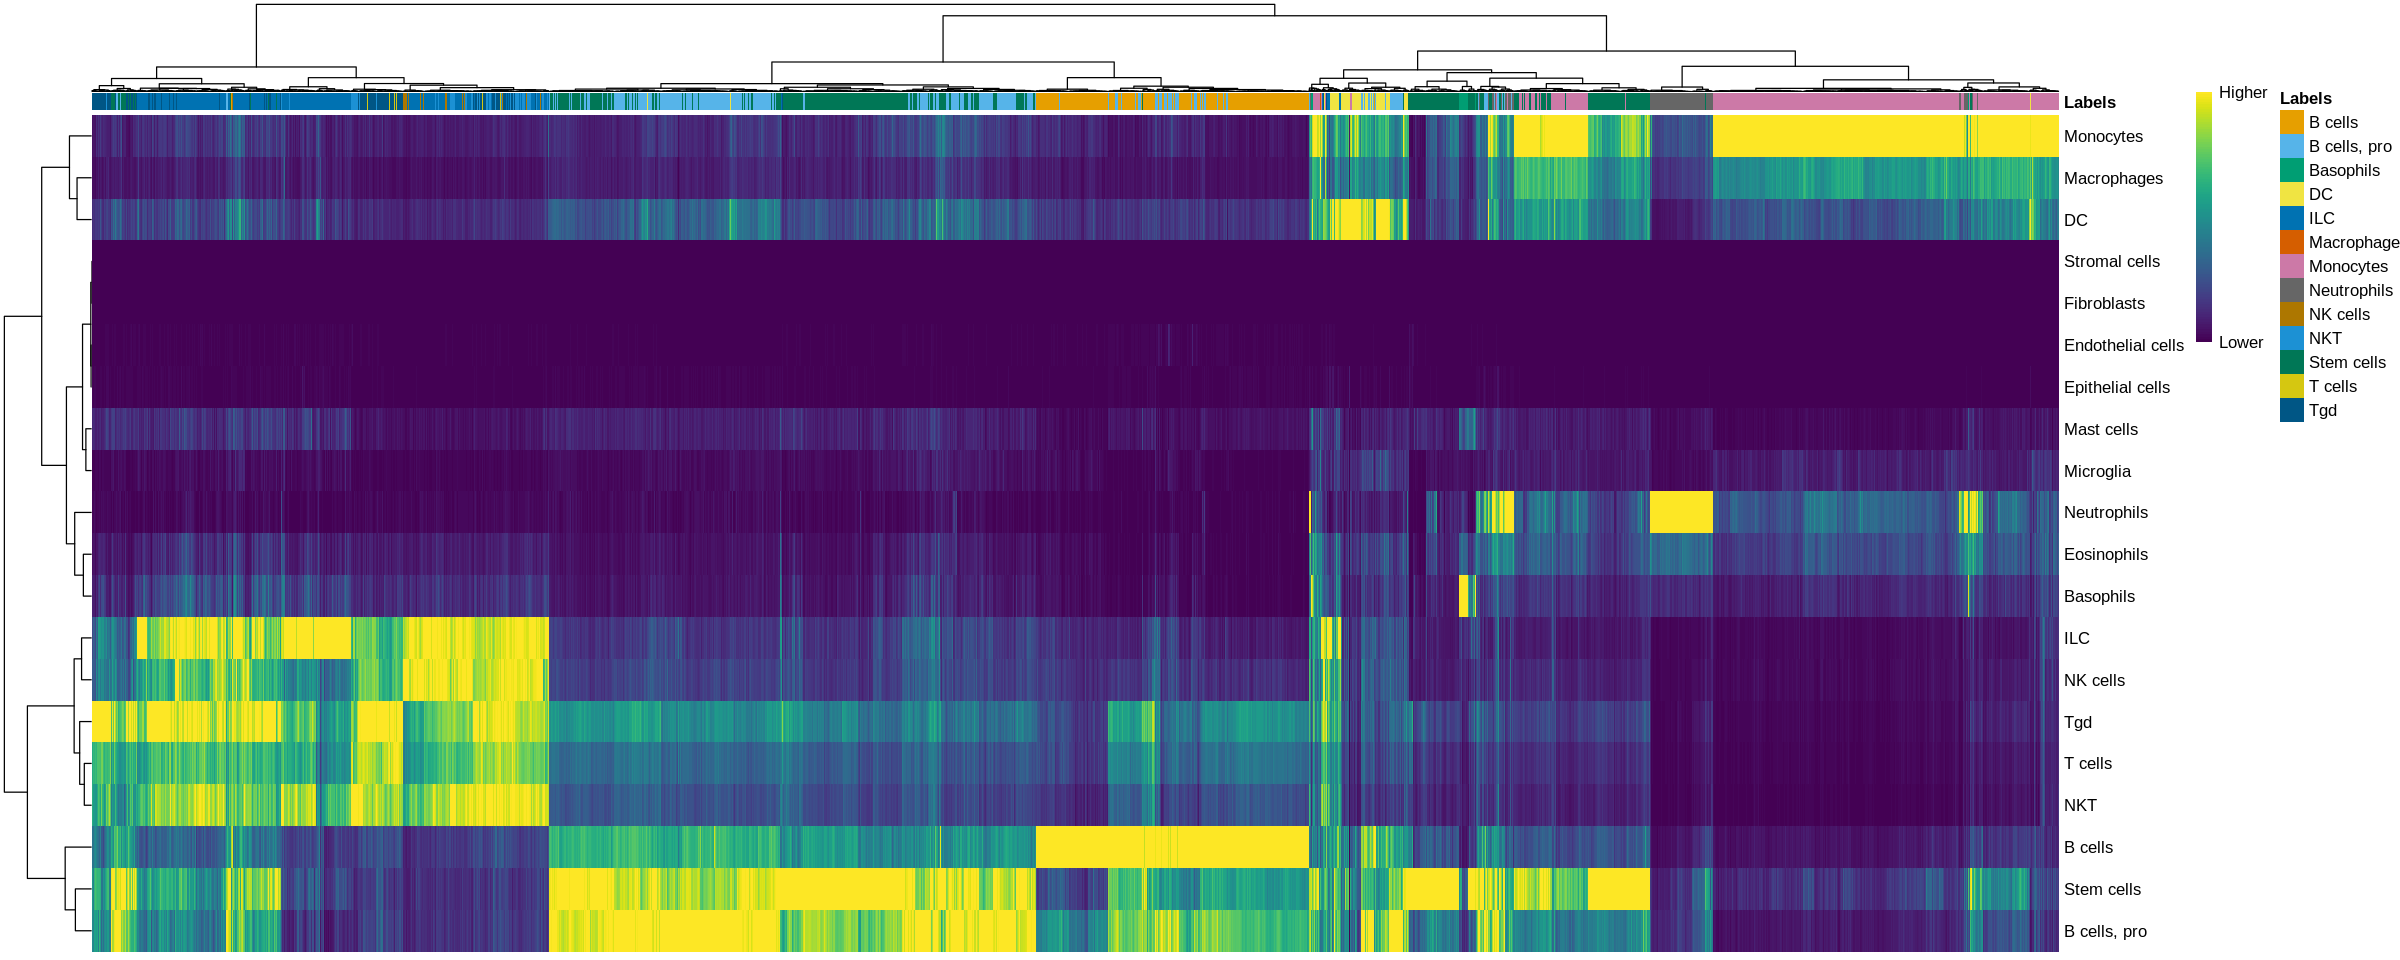

In [9]:
options(repr.plot.width=20, repr.plot.height=8)
plotScoreHeatmap(pred.immgen.main)

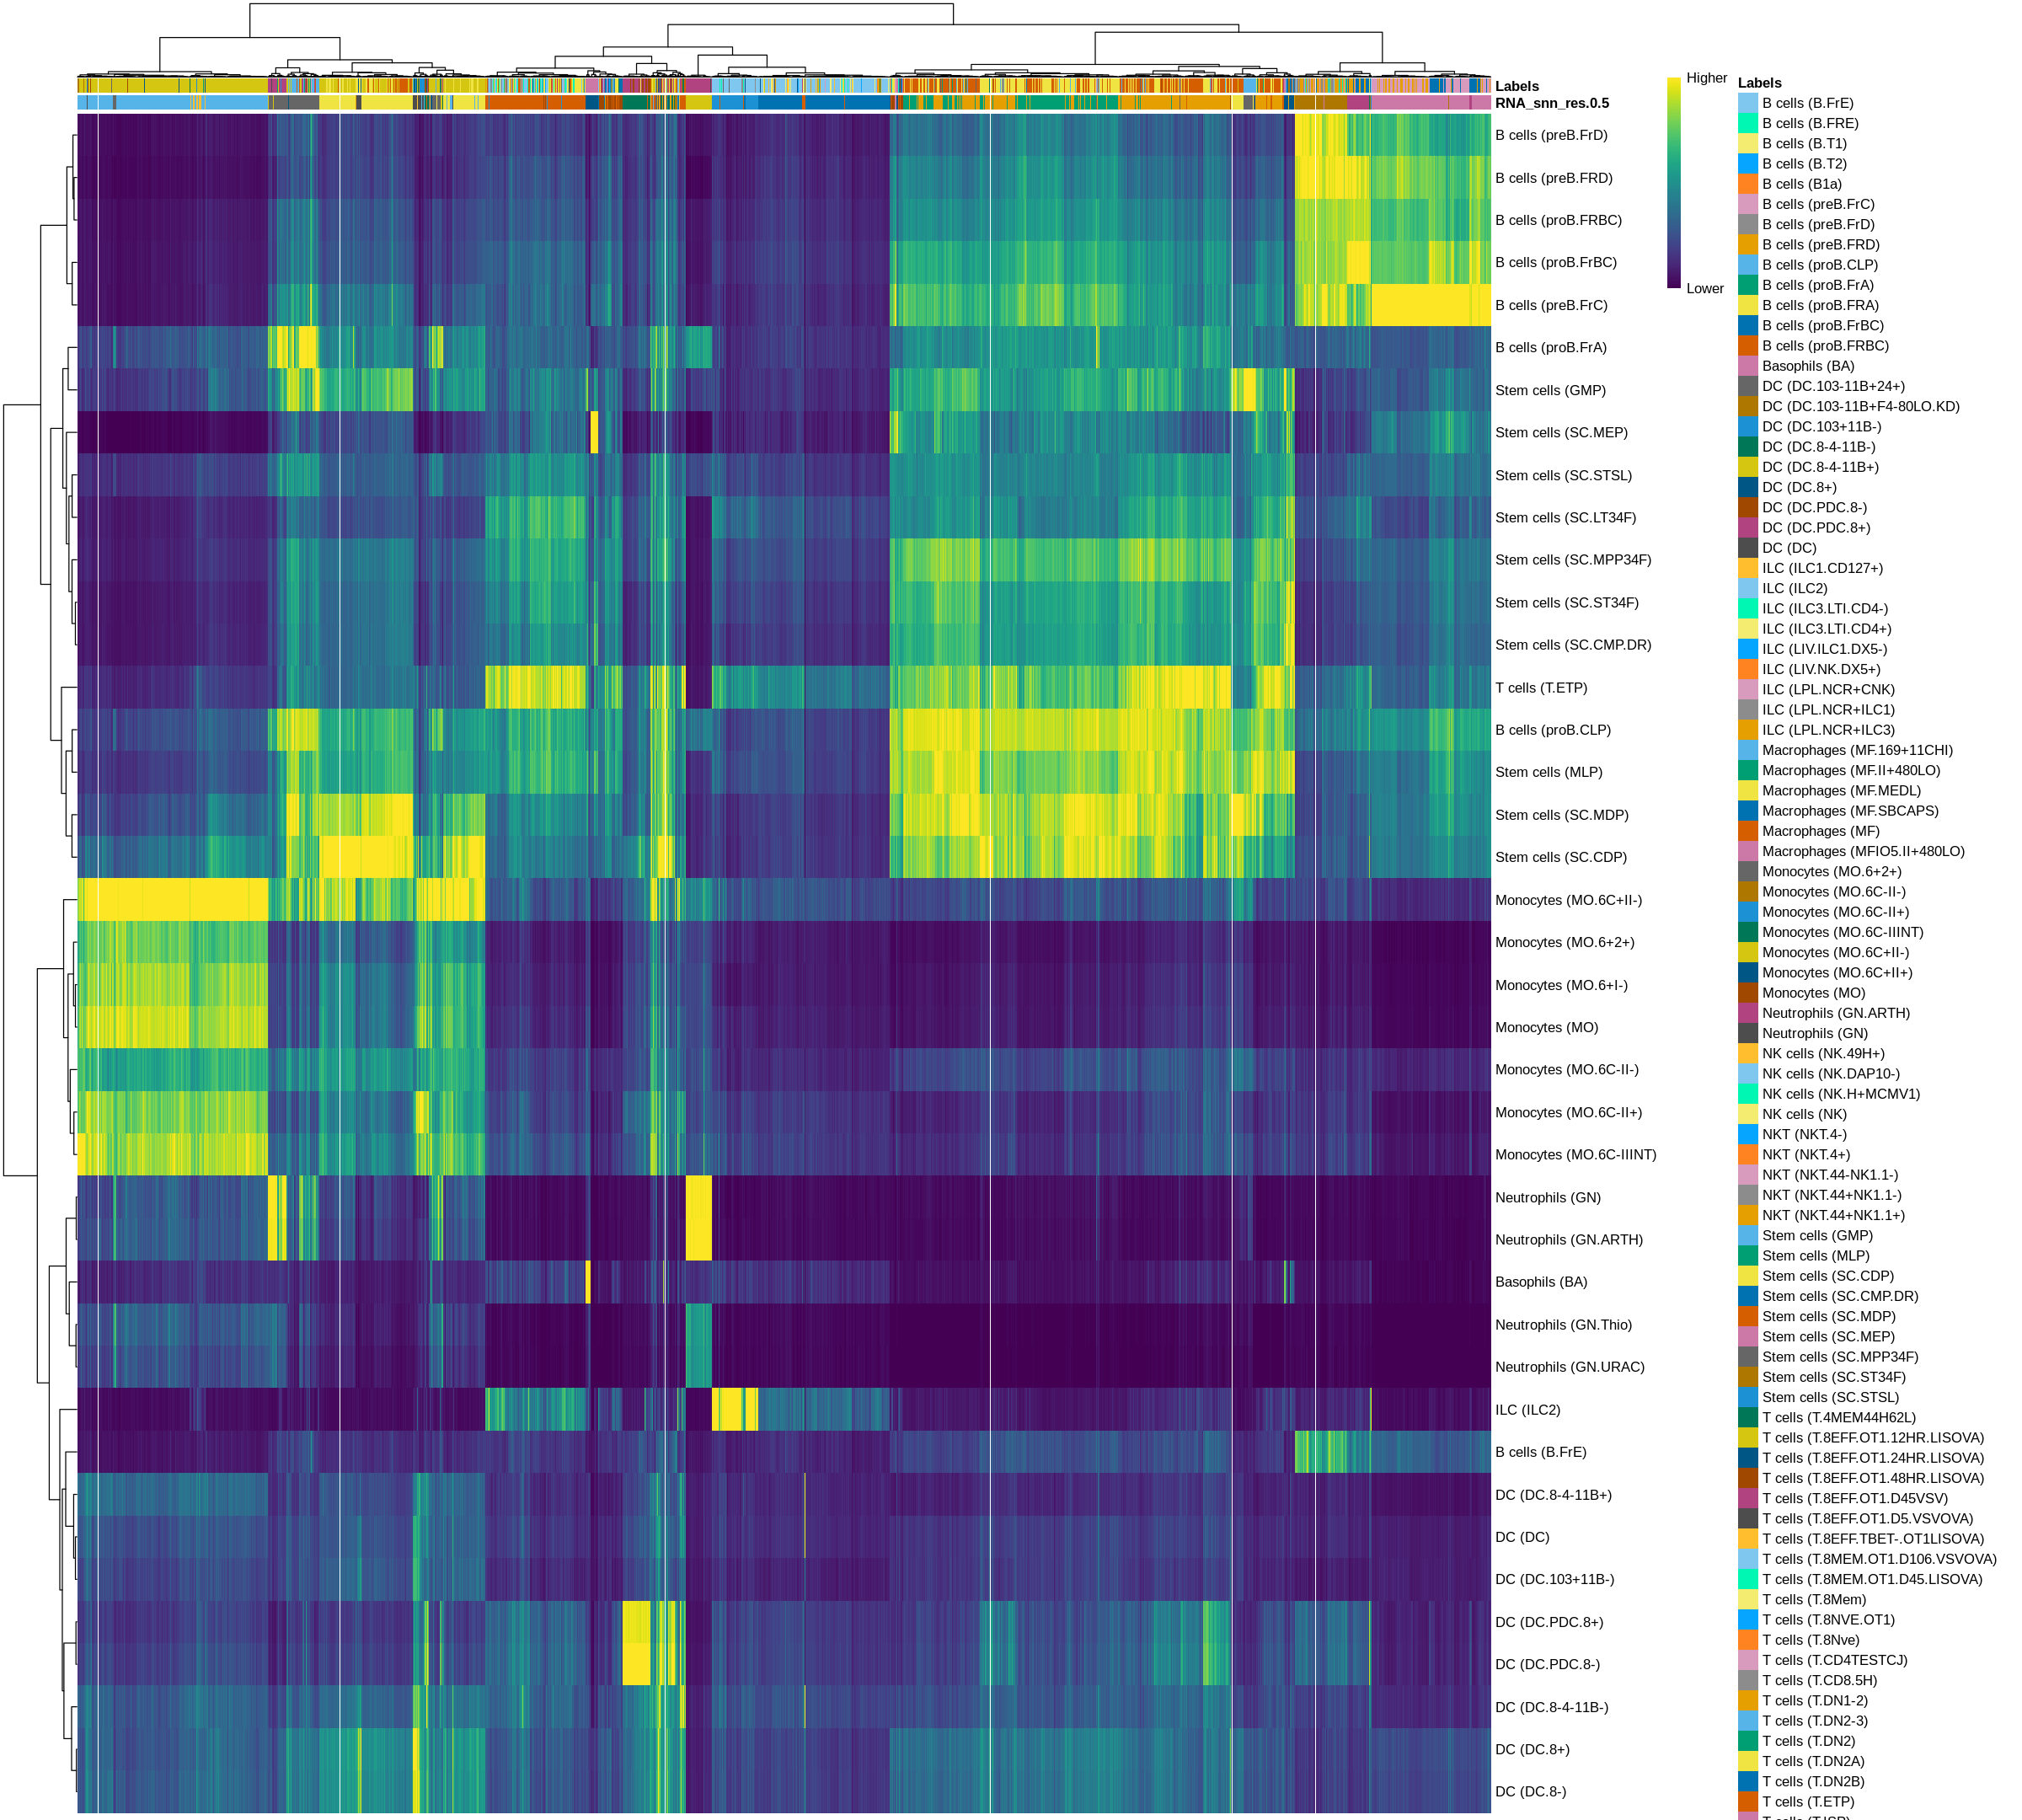

In [10]:
options(repr.plot.width=20, repr.plot.height=18)
plotScoreHeatmap(pred.immgen.fine,annotation_col=as.data.frame(seu[["RNA_snn_res.0.5"]]) )

In [11]:
seu[["pred.immgen.fine"]]      <-pred.immgen.fine$labels
seu[["pred.immgen.finepruned"]]<-pred.immgen.fine$pruned.labels

seu[["pred.immgen.main"]]      <-pred.immgen.main$labels
seu[["pred.immgen.mainpruned"]]<-pred.immgen.main$pruned.labels

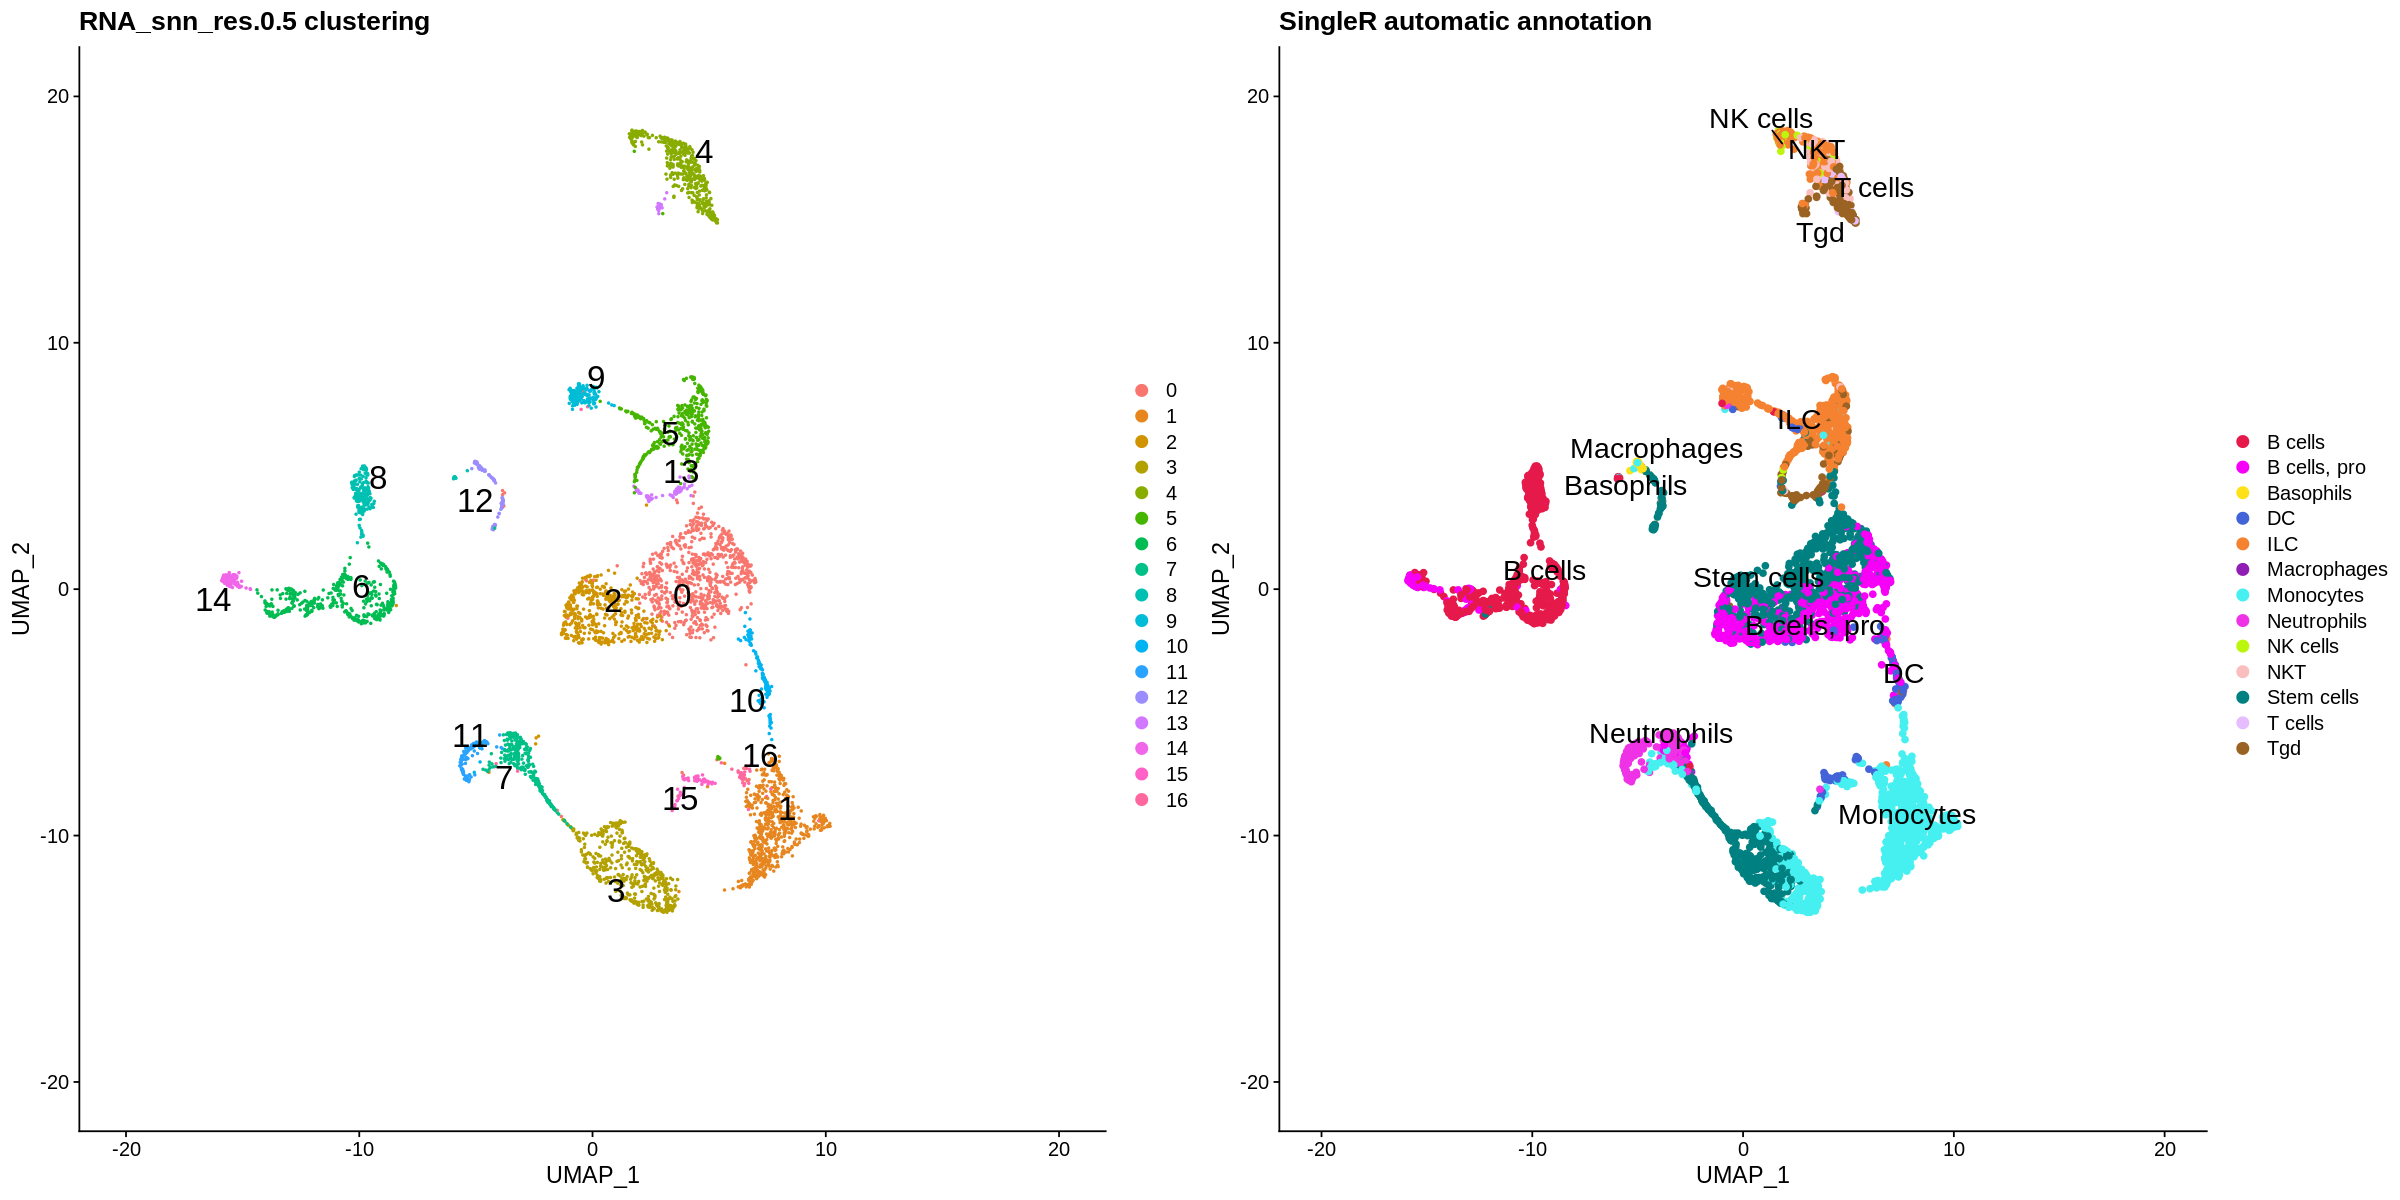

In [23]:
options(repr.plot.width=20, repr.plot.height=10)

Idents(seu)<-"RNA_snn_res.0.5"
ggarrange(
    UMAPPlot(seu, 
             group.by="RNA_snn_res.0.5", label=T, repel=T, label.size=7)+xlim(-20,20)+ylim(-20,20)+theme(legend.position = "right")+
    ggtitle("RNA_snn_res.0.5 clustering"),
    
    DimPlot(seu, 
         group.by="pred.immgen.main", label.size=6, 
         cols=c('#e6194b', '#F700F7', '#ffe119', '#4363d8', '#f58231', 
                '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', 
                '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000', 
                '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080', '#4f34ff', '#f340F0'), 
         pt.size=1.5,label=T, repel=T)+xlim(-20,20)+ylim(-20,20)+theme(legend.position ="right")+
    ggtitle("SingleR automatic annotation"), 
    ncol=2, nrow=1
)


In [24]:
# T-cell
seu<- subset(seu, subset=RNA_snn_res.0.5!=4)
seu<- subset(seu, Cd3e==0, slot="counts")

# B cell
seu<- subset(seu, subset=RNA_snn_res.0.5!=8 & RNA_snn_res.0.5!=6 & RNA_snn_res.0.5!=14)
seu<- subset(seu, Cd79a==0, slot="counts")

# RBC
seu<- subset(seu, `Hba-a1`<4, slot="data")

# Endothelia
seu<- subset(seu, Vwf==0, slot="counts")

In [25]:
options(warn=-1)
tic()
seu  <- NormalizeData(seu,  normalization.method="LogNormalize", scale.factor=10000, block.size=800)
seu  <- FindVariableFeatures(seu,  selection.method = "vst", nfeatures = 2000)
plan("sequential")
seu <- ScaleData(seu,  features=rownames(seu), block.size = 1000, min.cells.to.block = 1000)
plan("sequential")
toc()

tic()
seu <- RunPCA(seu, npcs=30, verbose = FALSE)
seu <- RunUMAP(seu, dims = 1:30, umap.method = "umap-learn", metric = "correlation", verbose = FALSE)
toc()

tic()
seu <- FindNeighbors(object = seu, dims = 1:30,verbose=FALSE)
seu <- FindClusters( object = seu, resolution = c(0.1,0.2,0.3,0.4,0.5),verbose=FALSE)
toc()

Centering and scaling data matrix



7.74 sec elapsed
15.396 sec elapsed
1.26 sec elapsed


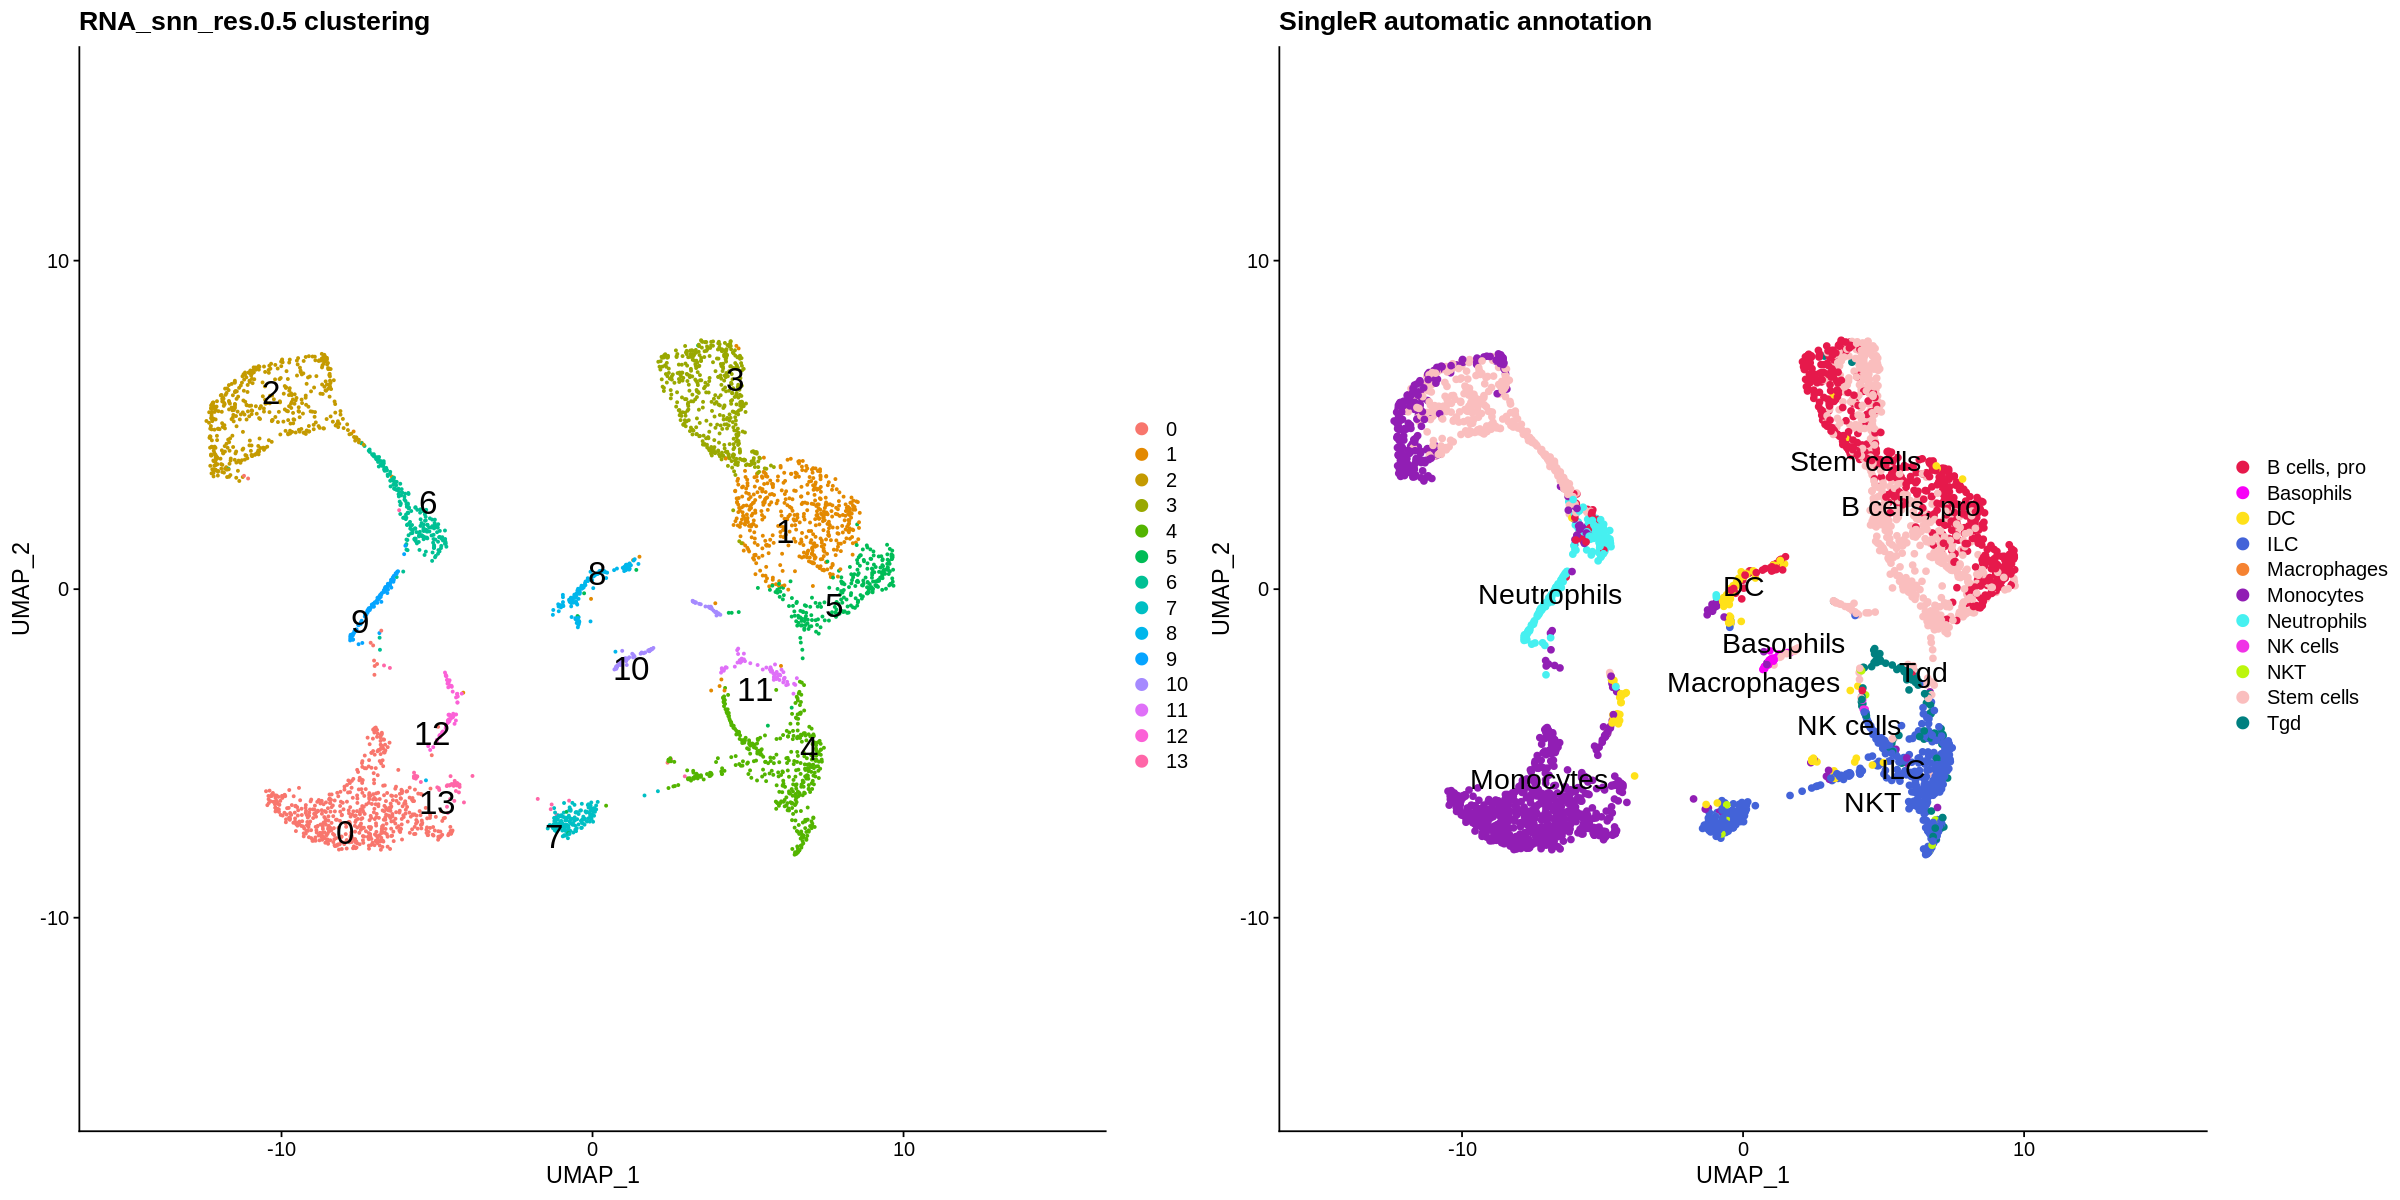

In [26]:
options(repr.plot.width=20, repr.plot.height=10)

Idents(seu)<-"RNA_snn_res.0.5"
ggarrange(
    UMAPPlot(seu, 
             group.by="RNA_snn_res.0.5", label=T, repel=T, label.size=7)+xlim(-15,15)+ylim(-15,15)+theme(legend.position = "right")+
    ggtitle("RNA_snn_res.0.5 clustering"),
    
    DimPlot(seu, 
         group.by="pred.immgen.main", label.size=6, 
         cols=c('#e6194b', '#F700F7', '#ffe119', '#4363d8', '#f58231', 
                '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', 
                '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000', 
                '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080', '#4f34ff', '#f340F0'), 
         pt.size=1.5,label=T, repel=T)+xlim(-15,15)+ylim(-15,15)+theme(legend.position ="right")+
    ggtitle("SingleR automatic annotation"), 
    ncol=2, nrow=1
)


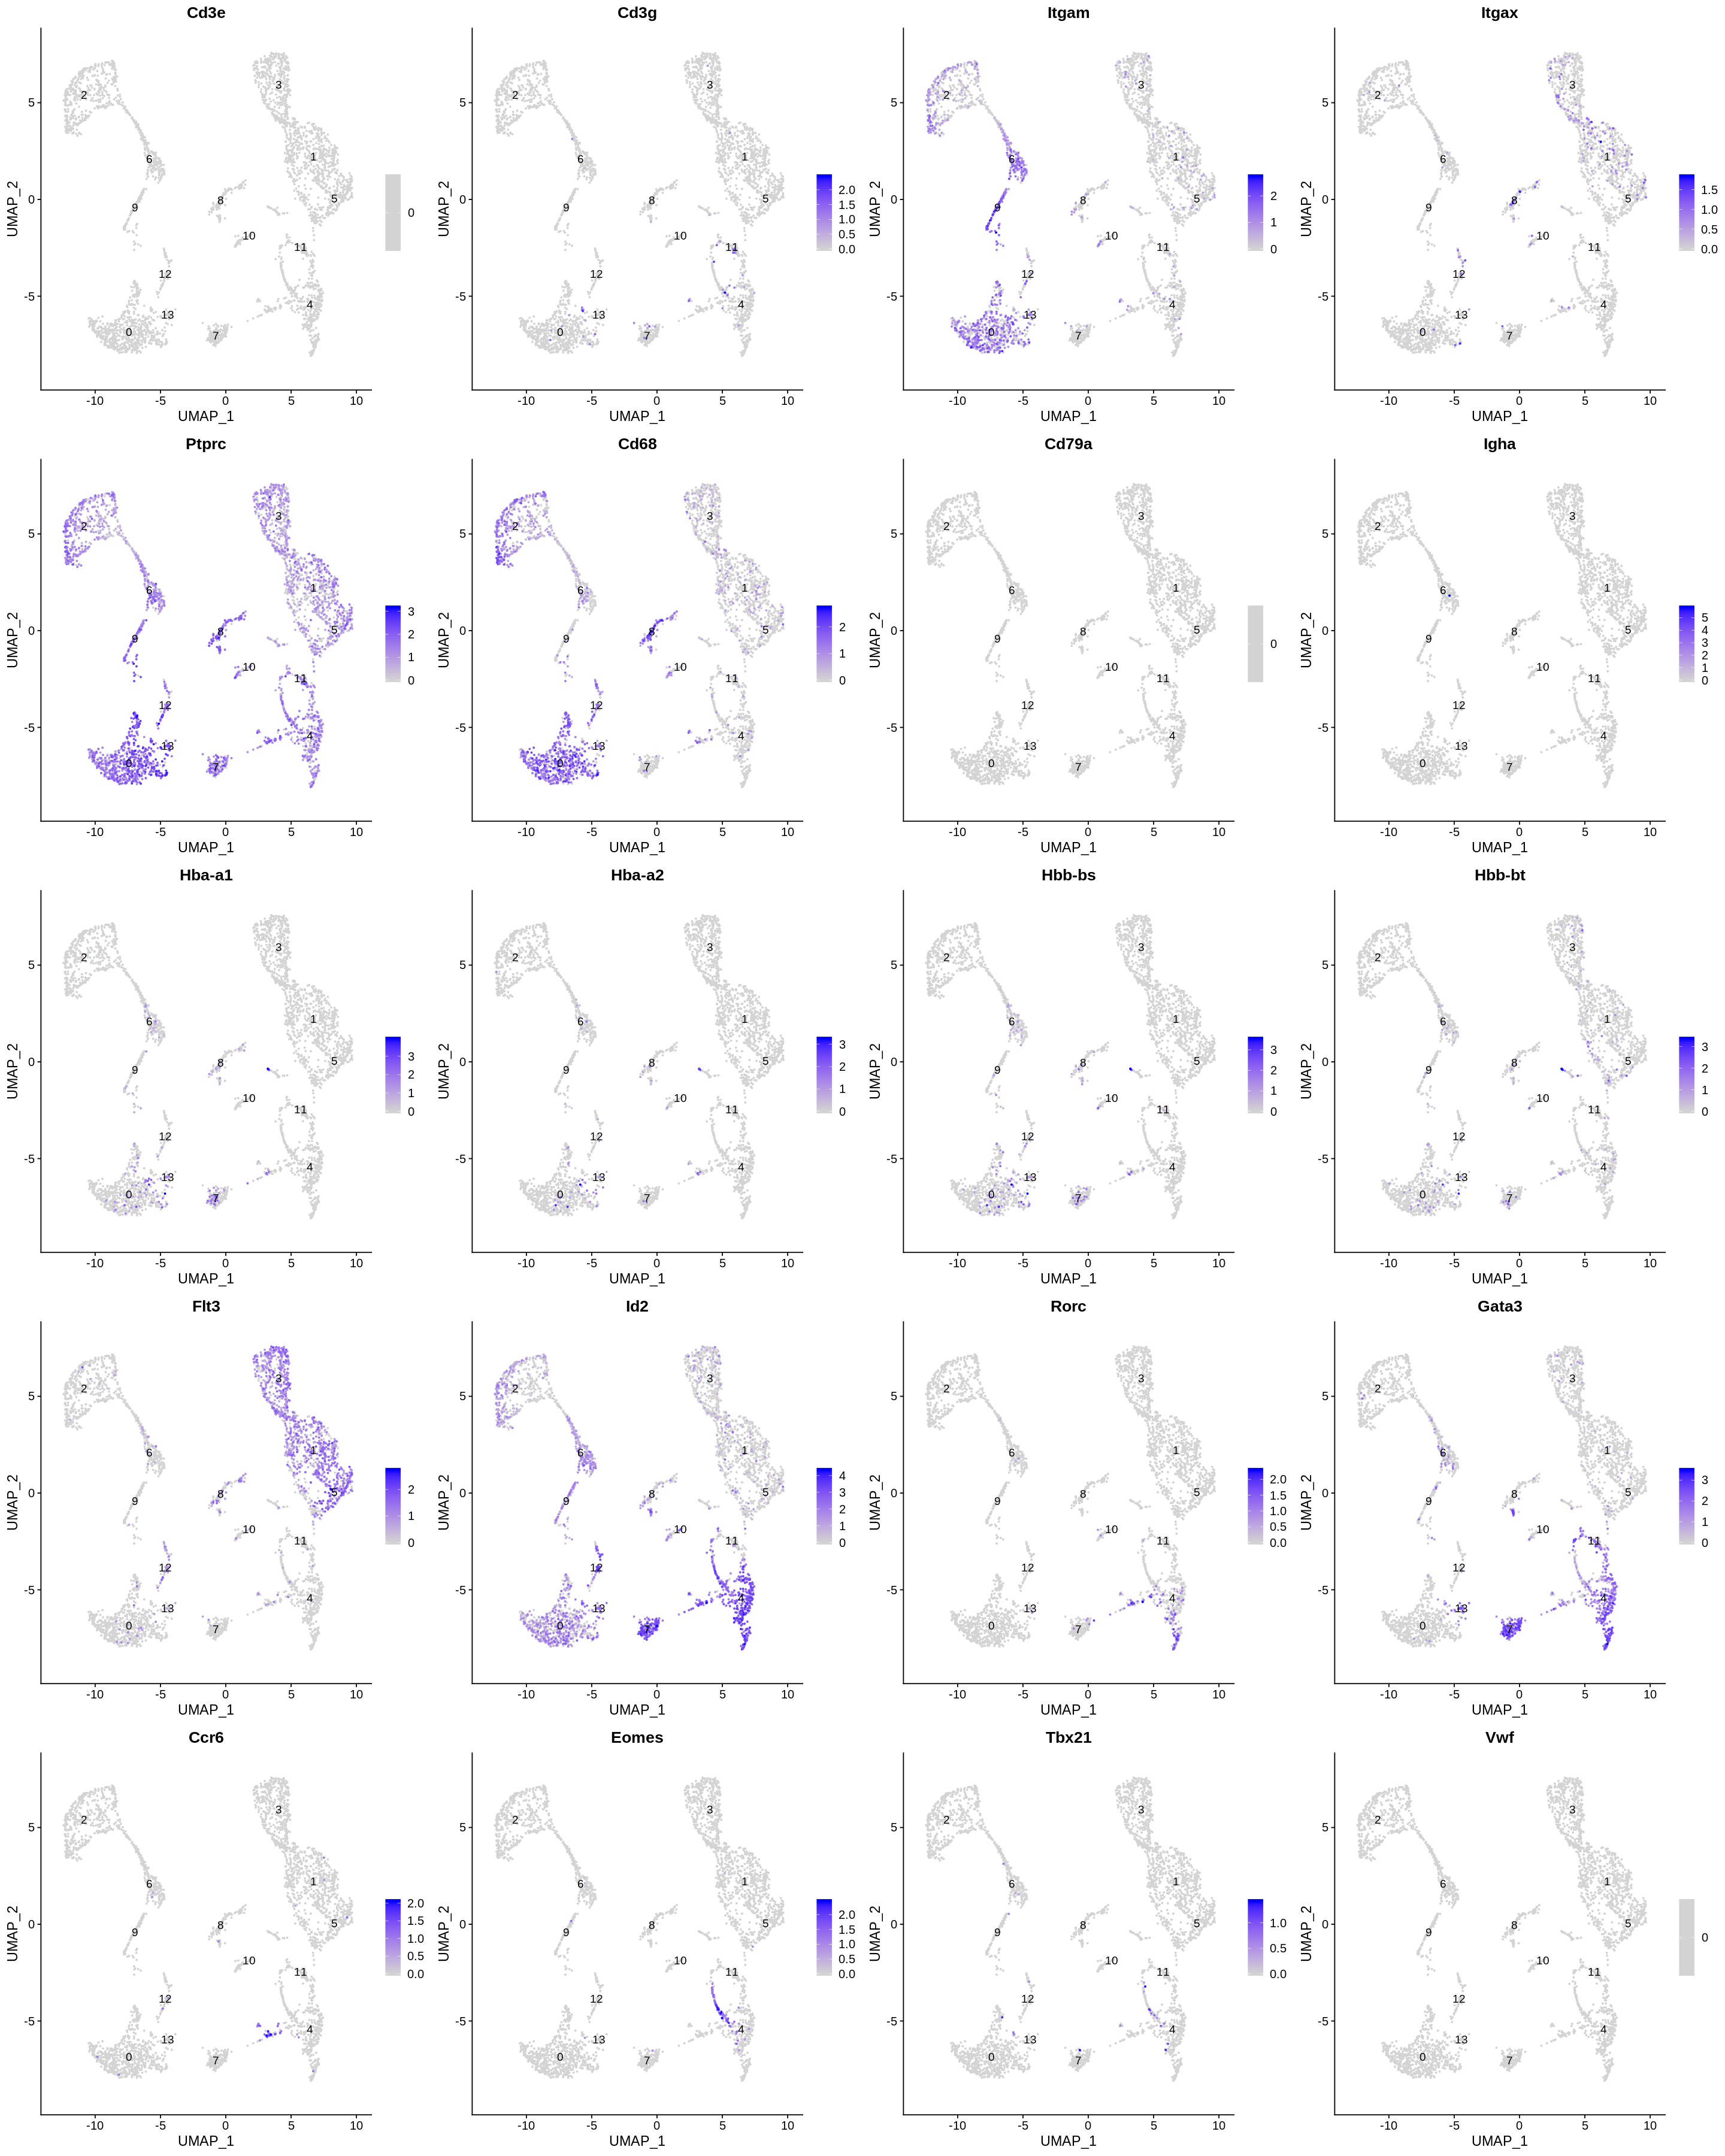

In [27]:
options(repr.plot.width=6*4, repr.plot.height=6*5,repe.plot.resolution=300)
FeaturePlot(seu, ncol=4, label=T, sort.cell = T,
            features = c("Cd3e","Cd3g","Itgam","Itgax",
                         "Ptprc","Cd68","Cd79a","Igha",
                         "Hba-a1","Hba-a2","Hbb-bs","Hbb-bt",
                         "Flt3","Id2","Rorc","Gata3",
                         "Ccr6","Eomes","Tbx21","Vwf"))

In [28]:
# Myeloid and other progenitors
seu<- subset(seu, subset=RNA_snn_res.0.5!=2 & RNA_snn_res.0.5!=6 & RNA_snn_res.0.5!=9 &
                         RNA_snn_res.0.5!=0 & RNA_snn_res.0.5!=12& RNA_snn_res.0.5!=13)

In [29]:
options(warn=-1)
tic()
seu  <- NormalizeData(seu,  normalization.method="LogNormalize", scale.factor=10000, block.size=800)
seu  <- FindVariableFeatures(seu,  selection.method = "vst", nfeatures = 2000)
plan("sequential")
seu <- ScaleData(seu,  features=rownames(seu), block.size = 1000, min.cells.to.block = 1000)
plan("sequential")
toc()

tic()
seu <- RunPCA(seu, npcs=30, verbose = FALSE)
seu <- RunUMAP(seu, dims = 1:30, umap.method = "umap-learn", metric = "correlation", verbose = FALSE)
toc()

tic()
seu <- FindNeighbors(object = seu, dims = 1:30,verbose=FALSE)
seu <- FindClusters( object = seu, resolution = c(0.1,0.2,0.3,0.4,0.5),verbose=FALSE)
toc()

Centering and scaling data matrix



4.473 sec elapsed
5.99 sec elapsed
0.792 sec elapsed


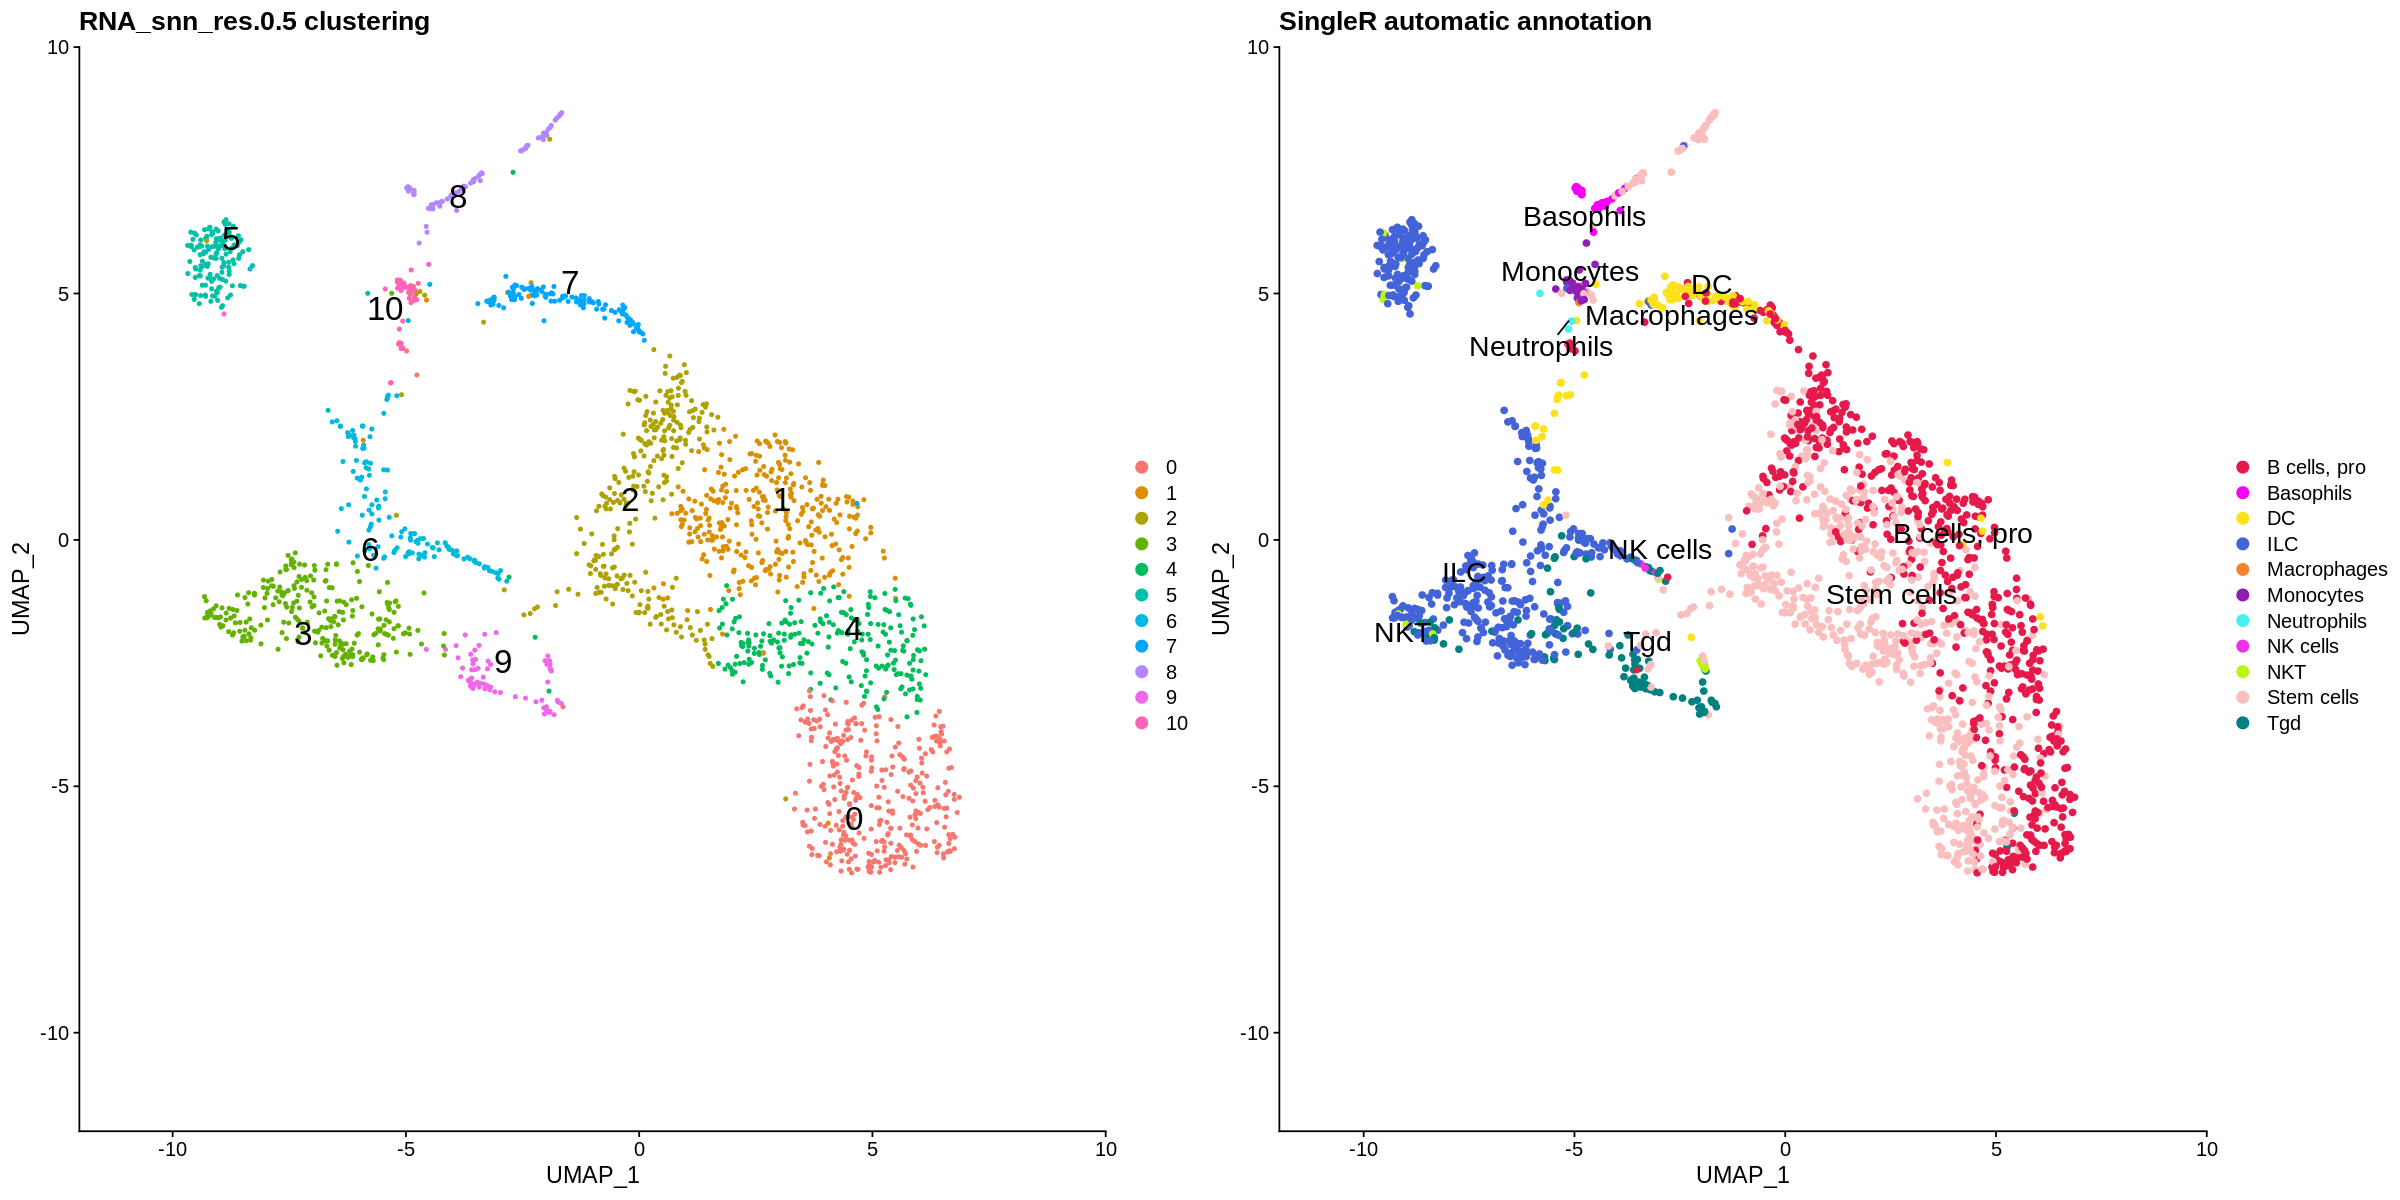

In [32]:
options(repr.plot.width=20, repr.plot.height=10)

Idents(seu)<-"RNA_snn_res.0.5"
ggarrange(
    UMAPPlot(seu, 
             group.by="RNA_snn_res.0.5", label=T, repel=T, label.size=7)+xlim(-11,9)+ylim(-11,9)+theme(legend.position = "right")+
    ggtitle("RNA_snn_res.0.5 clustering"),
    
    DimPlot(seu, 
         group.by="pred.immgen.main", label.size=6, 
         cols=c('#e6194b', '#F700F7', '#ffe119', '#4363d8', '#f58231', 
                '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', 
                '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000', 
                '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080', '#4f34ff', '#f340F0'), 
         pt.size=1.5,label=T, repel=T)+xlim(-11,9)+ylim(-11,9)+theme(legend.position ="right")+
    ggtitle("SingleR automatic annotation"), 
    ncol=2, nrow=1
)


In [37]:
pdf(file="./PP2_data/ABMaLP1_PP2_UMAP(RNA.snn.res.0.5).pdf", width=20, height=10)

Idents(seu)<-"RNA_snn_res.0.5"
ggarrange(
    UMAPPlot(seu, 
             group.by="RNA_snn_res.0.5", label=T, repel=T, label.size=7)+xlim(-11,9)+ylim(-11,9)+theme(legend.position = "right")+
    ggtitle("RNA_snn_res.0.5 clustering"),
    
    DimPlot(seu, 
         group.by="pred.immgen.main", label.size=6, 
         cols=c('#e6194b', '#F700F7', '#ffe119', '#4363d8', '#f58231', 
                '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', 
                '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000', 
                '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080', '#4f34ff', '#f340F0'), 
         pt.size=1.5,label=T, repel=T)+xlim(-11,9)+ylim(-11,9)+theme(legend.position ="right")+
    ggtitle("SingleR automatic annotation"), 
    ncol=2, nrow=1
)

dev.off()

png 
  2

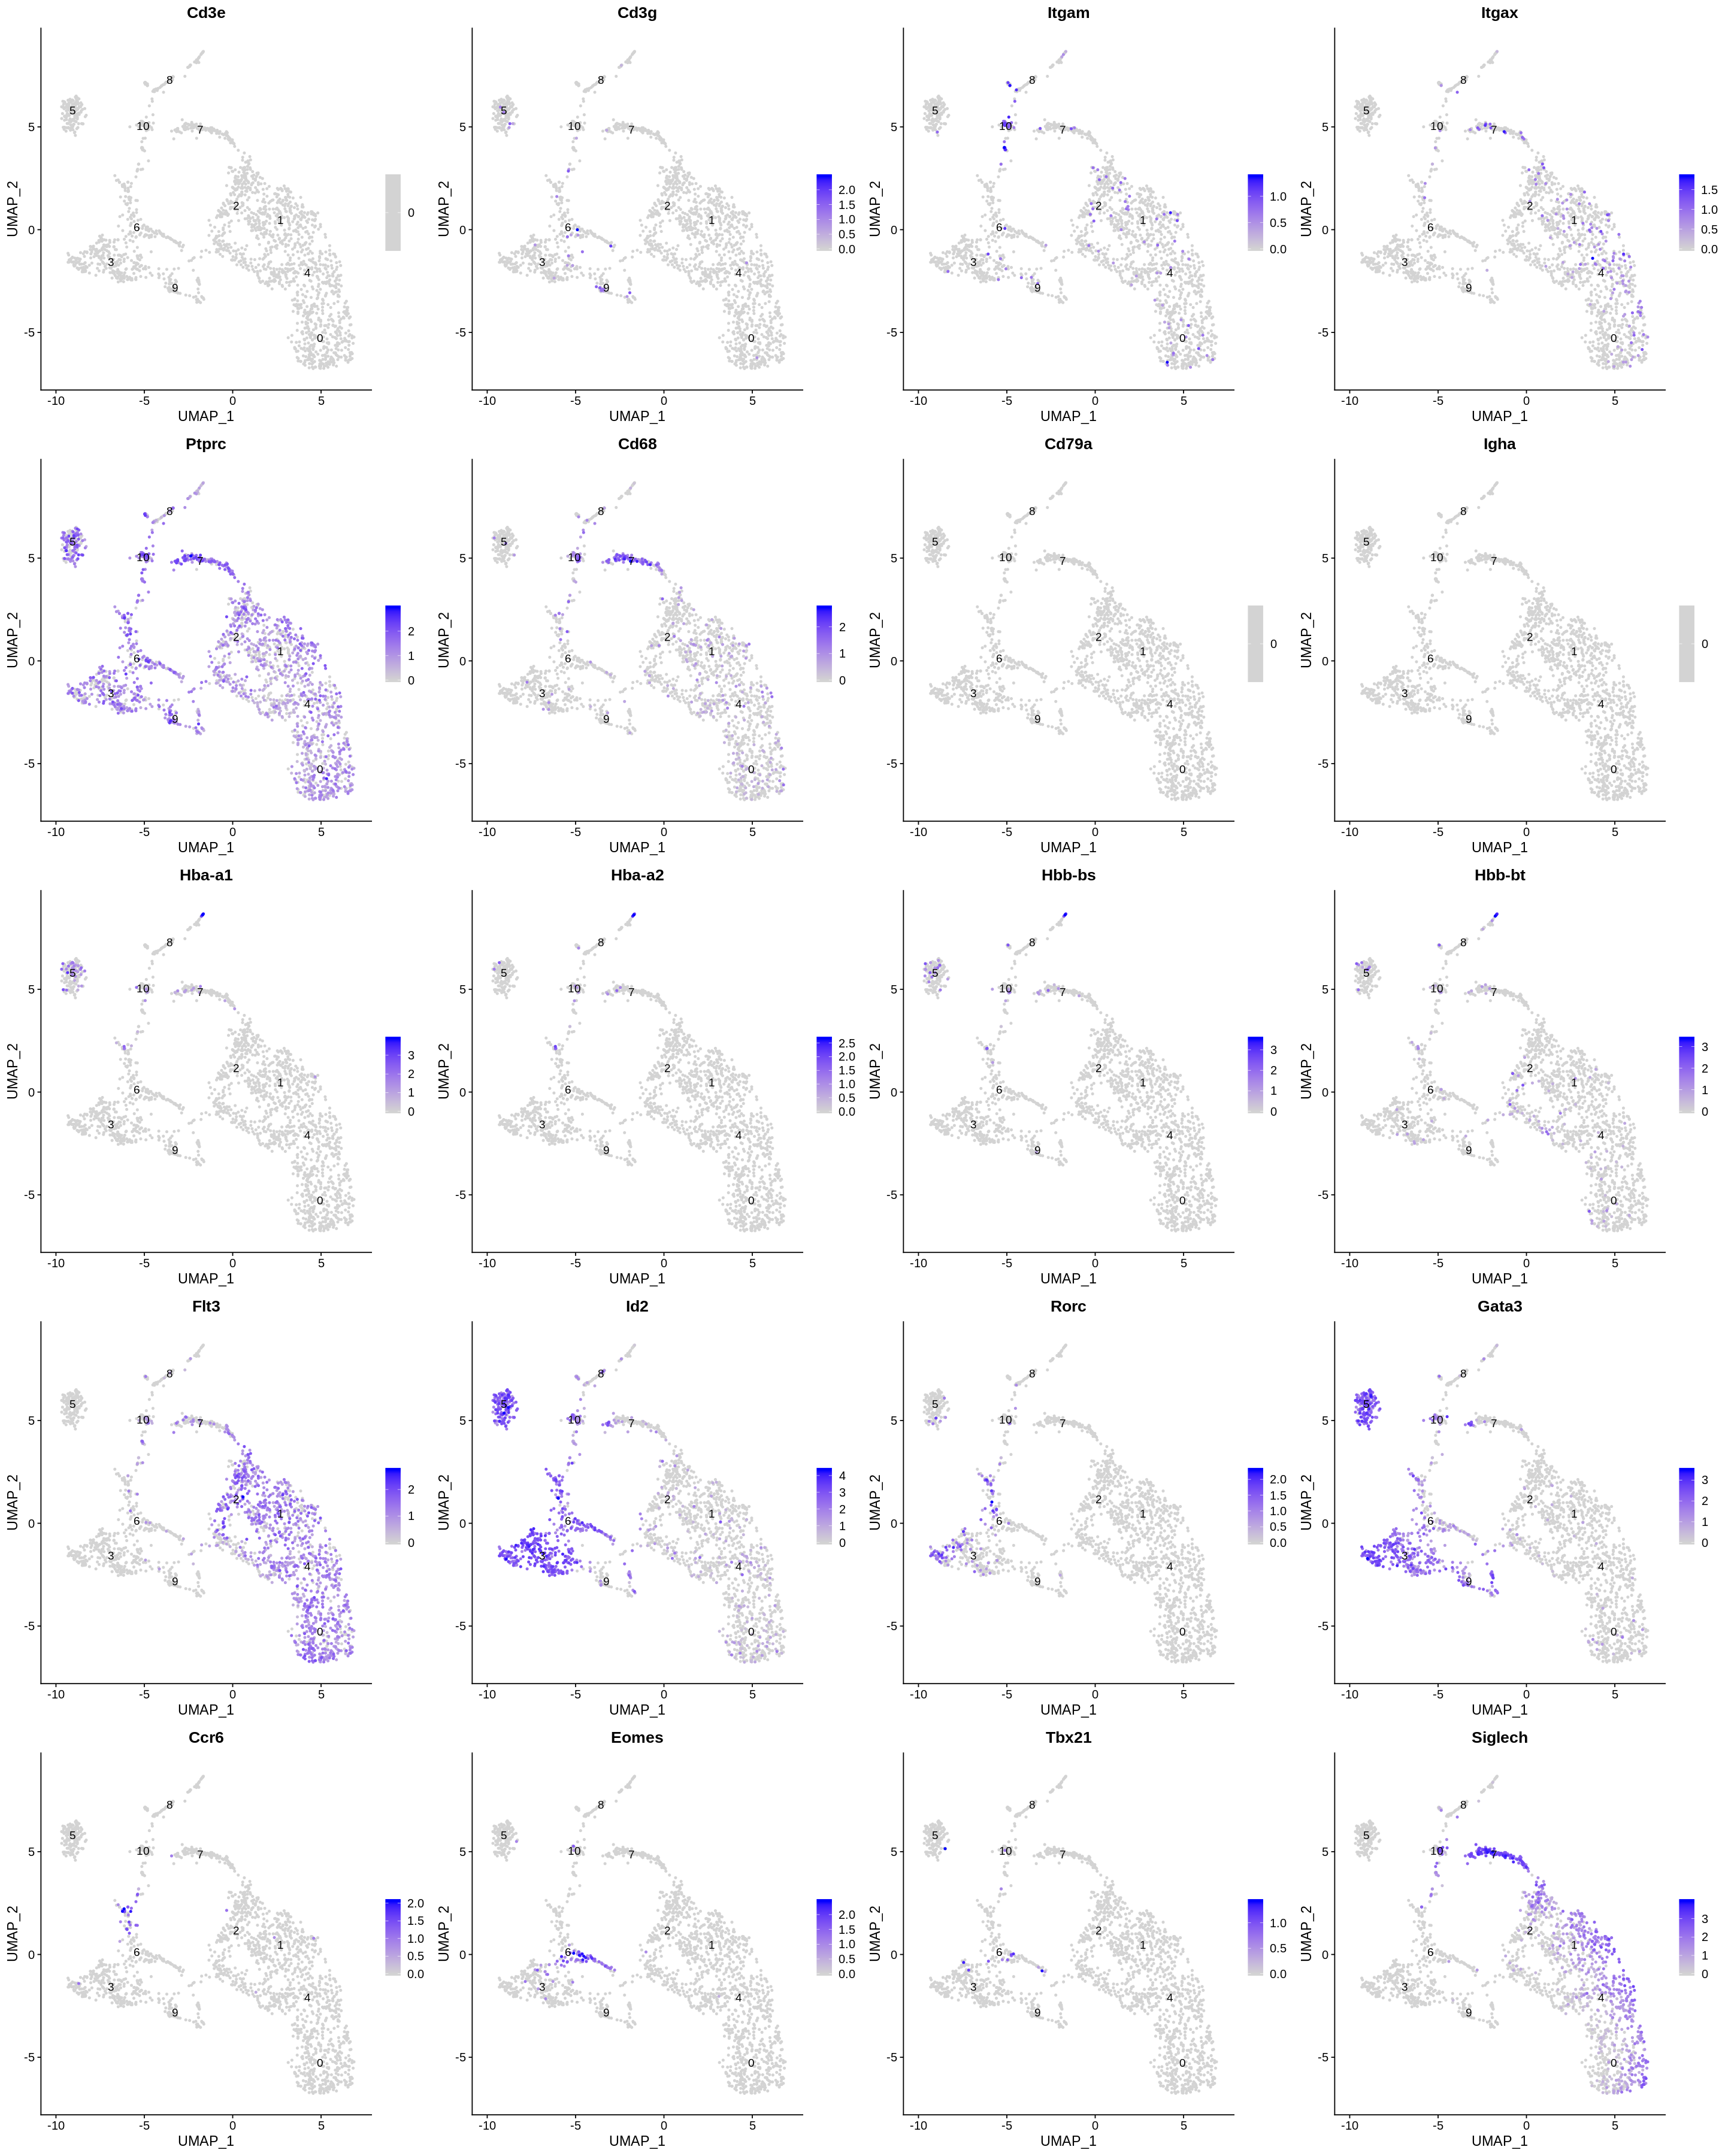

In [33]:
options(repr.plot.width=6*4, repr.plot.height=6*5,repe.plot.resolution=300)
FeaturePlot(seu, ncol=4, label=T, sort.cell = T,
            features = c("Cd3e","Cd3g","Itgam","Itgax",
                         "Ptprc","Cd68","Cd79a","Igha",
                         "Hba-a1","Hba-a2","Hbb-bs","Hbb-bt",
                         "Flt3","Id2","Rorc","Gata3",
                         "Ccr6","Eomes","Tbx21","Siglech"))

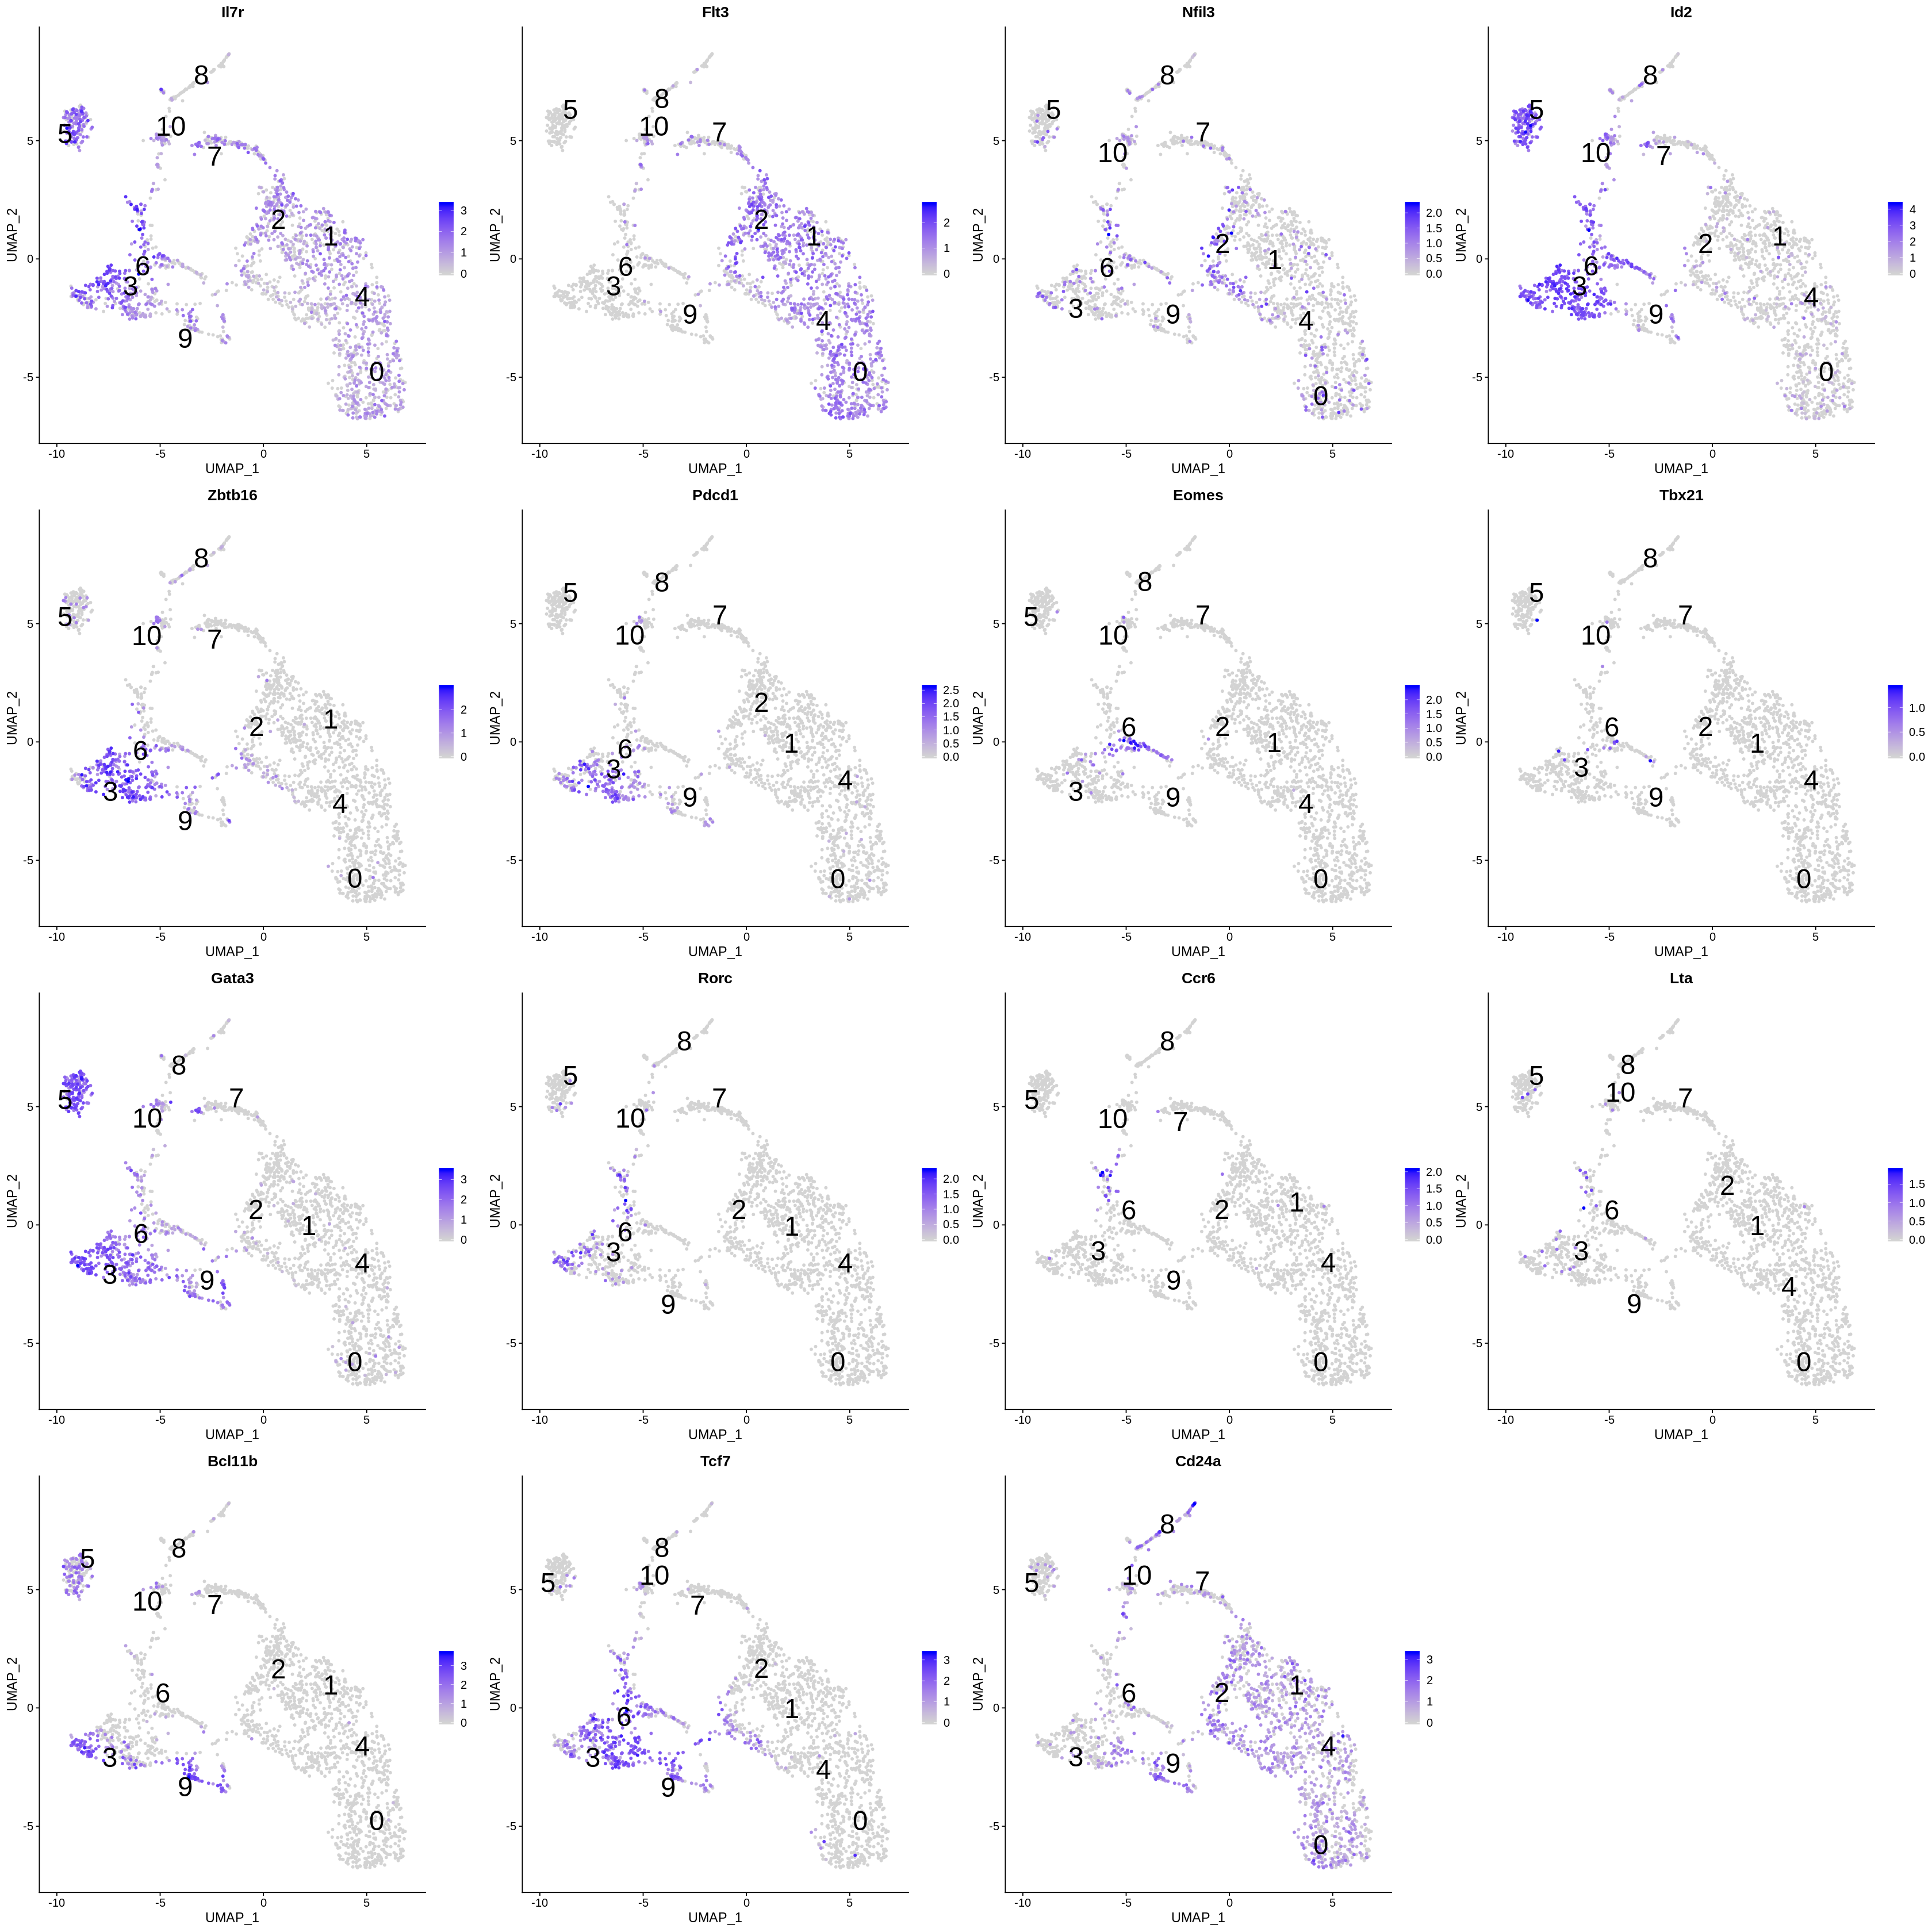

In [34]:
options(warn=0)
options(repr.plot.width=7*4, repr.plot.height=7*4)
Idents(seu)<-"RNA_snn_res.0.5"
FeaturePlot(seu, ncol=4,reduction="umap", label=T, sort.cell=T,pt.size=1,label.size = 10,repel =T,
            features = c("Il7r", "Flt3", "Nfil3", "Id2", "Zbtb16", "Pdcd1", "Eomes", "Tbx21", "Gata3", "Rorc", "Ccr6", "Lta", "Bcl11b","Tcf7","Cd24a")
)

In [39]:
Idents(seu)<-"RNA_snn_res.0.5"
tic("DE")
markers <- FindAllMarkers(seu, only.pos = TRUE, min.pct = 0.25, 
                          logfc.threshold = 0.25, return.thresh = 0.01)
toc()


Calculating cluster 0

Calculating cluster 1

Calculating cluster 2

Calculating cluster 3

Calculating cluster 4

Calculating cluster 5

Calculating cluster 6

Calculating cluster 7

Calculating cluster 8

Calculating cluster 9

Calculating cluster 10



DE: 59.656 sec elapsed


In [40]:
tic()

# Filter
markers <- markers[ markers$p_val_adj<0.01, ]
# Sort
markers <- markers[ order(markers$cluster, -markers$avg_logFC), ]

# Annotate
source("https://raw.github.com/chansigit/SSAT/master/annotate.genelist.R")
markers<-annotate.genelist(markers, tf=mm.tf, surface=mm.cellsurfacemarker, secretory=mm.secretory)

toc()


8.243 sec elapsed


In [41]:
# Visualize
library(devtools)
markers.viz  <- markers %>% group_by(cluster) %>% top_n(n = 20, wt = avg_logFC)
markers.viz2 <- markers[markers$is.tf=="TF"| markers$is.secretory=="Secretory"|markers$is.surface=="Surface", ]%>% group_by(cluster) %>% top_n(n = 15, wt = avg_logFC)  

Loading required package: usethis



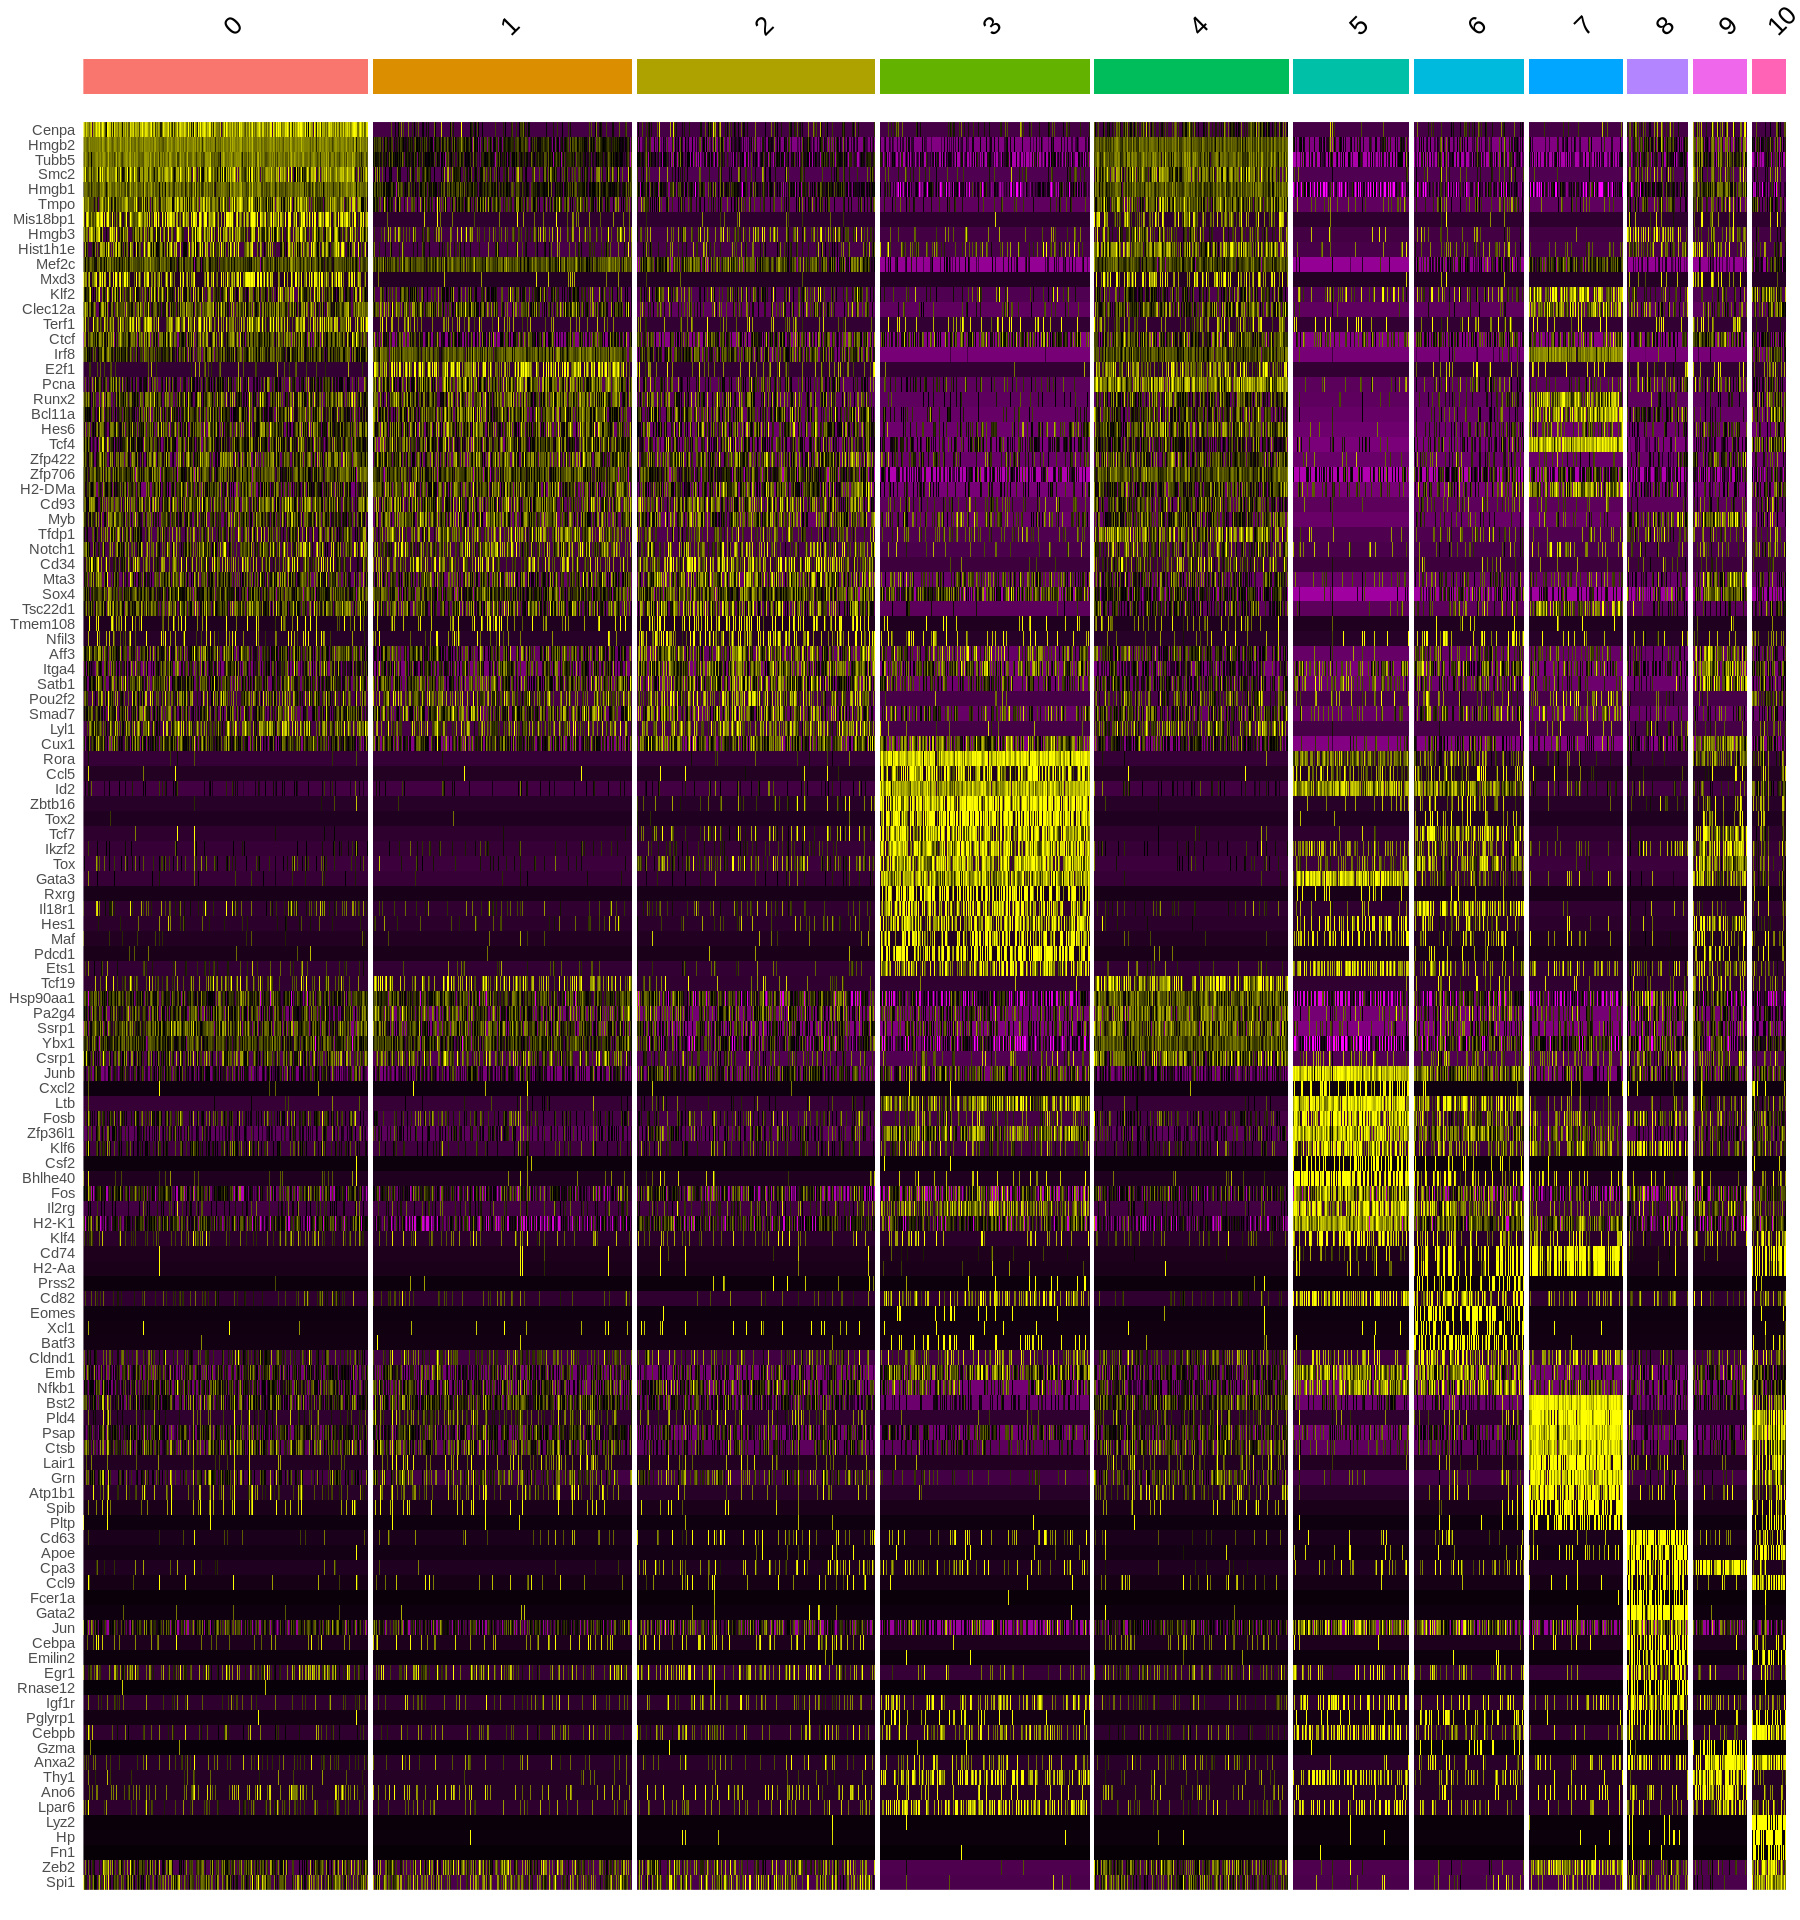

In [42]:
options(repr.plot.width=15, repr.plot.height=16,repr.plot.resolution=300)
DoHeatmap(seu, features = markers.viz2$gene) + NoLegend()

In [44]:
pdf(file="./PP2_data/ABMaLP1_PP2_DEGhm(RNA.snn.res.0.5).pdf", width=16, height=18)
DoHeatmap(seu, features = markers.viz2$gene) + NoLegend()
dev.off()

png 
  2

In [45]:
write.csv(markers, file="./PP2_data/ABMaLP1_PP2_DEGlist(RNA.snn.res.0.5).csv")

In [36]:
save(seu, file="./PP2_data/A", compress=T)